In [1]:
import os
import pandas as pd
import numpy as np
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.mstats import pearsonr
from flexitext import flexitext


# Homemade functions

In [2]:

def plot_correlations_bothTrailers(dataset_df, type, comedy_corr, horror_corr, title):
    
    # Define ROI labels. 
    NAcc_label = "NAcc_" + type
    AIns_label = "AIns_" + type
    MPFC_label = "MPFC_" + type

    whole_both_trailers_plot = sns.pairplot(
        dataset_df,
        kind="reg",
        x_vars=[NAcc_label, AIns_label, MPFC_label],
        y_vars=["Pos_arousal_scaled", "Neg_arousal_scaled"], 
        hue="Type",
        palette="viridis", 
        #scatter_kws = {"s":3} try to change the size of the dots
        height=5,
        aspect=1.2)
    
    whole_both_trailers_plot.fig.suptitle(title, y=1.03, fontsize=20, fontweight ="bold")
    plt.rc('legend', fontsize=25, title_fontsize=28, markerscale=2)

    # Add annotations to the first plot. 
    comedy_cor_string = "C r= " + str(round(comedy_corr[0][0], 4)) + "; p-value: " + str(round(comedy_corr[0][1], 5))
    horror_cor_string = "H r= " + str(round(horror_corr[0][0], 4)) + "; p-value: " + str(round(horror_corr[0][1], 5))
    whole_both_trailers_plot.axes[0, 0].text(s=horror_cor_string, x=.07, y=-2, fontsize=12)
    whole_both_trailers_plot.axes[0, 0].text(s=comedy_cor_string, x=.07, y=-2.3, fontsize=12)

    # Add annotations to the second plot.
    comedy_cor_string = "C r= " + str(round(comedy_corr[1][0], 4)) + "; p-value: " + str(round(comedy_corr[1][1], 5))
    horror_cor_string = "H r= " + str(round(horror_corr[1][0], 4)) + "; p-value: " + str(round(horror_corr[1][1], 5))
    whole_both_trailers_plot.axes[1, 0].text(s=horror_cor_string, x=.07, y=-2, fontsize=12)
    whole_both_trailers_plot.axes[1, 0].text(s=comedy_cor_string, x=.07, y=-2.3, fontsize=12)

    # Add annotations to the third plot.
    comedy_cor_string = "C r= " + str(round(comedy_corr[3][0], 4)) + "; p-value: " + str(round(comedy_corr[3][1], 5))
    horror_cor_string = "H r= " + str(round(horror_corr[3][0], 4)) + "; p-value: " + str(round(horror_corr[3][1], 5))
    whole_both_trailers_plot.axes[0, 1].text(s=horror_cor_string, x=.03, y=-2, fontsize=12)
    whole_both_trailers_plot.axes[0, 1].text(s=comedy_cor_string, x=.03, y=-2.3, fontsize=12)

    # Add annotations to the fourth plot.
    comedy_cor_string = "C r= " + str(round(comedy_corr[4][0], 4)) + "; p-value: " + str(round(comedy_corr[4][1], 5))
    horror_cor_string = "H r= " + str(round(horror_corr[4][0], 4)) + "; p-value: " + str(round(horror_corr[4][1], 5))
    whole_both_trailers_plot.axes[1, 1].text(s=horror_cor_string, x=.03, y=-2, fontsize=12)
    whole_both_trailers_plot.axes[1, 1].text(s=comedy_cor_string, x=.03, y=-2.3, fontsize=12)

    # Add annotations to the fifth plot.
    comedy_cor_string = "C r= " + str(round(comedy_corr[6][0], 4)) + "; p-value: " + str(round(comedy_corr[6][1], 5))
    horror_cor_string = "H r= " + str(round(horror_corr[6][0], 4)) + "; p-value: " + str(round(horror_corr[6][1], 5))
    whole_both_trailers_plot.axes[0, 2].text(s=horror_cor_string, x=.03, y=-2, fontsize=12)
    whole_both_trailers_plot.axes[0, 2].text(s=comedy_cor_string, x=.03, y=-2.3, fontsize=12)

    # Add annotations to the sixth plot.
    comedy_cor_string = "C r= " + str(round(comedy_corr[7][0], 4)) + "; p-value: " + str(round(comedy_corr[7][1], 5))
    horror_cor_string = "H r= " + str(round(horror_corr[7][0], 4)) + "; p-value: " + str(round(horror_corr[7][1], 5))
    whole_both_trailers_plot.axes[1, 2].text(s=horror_cor_string, x=.03, y=-2, fontsize=12)
    whole_both_trailers_plot.axes[1, 2].text(s=comedy_cor_string, x=.03, y=-2.3, fontsize=12)



In [3]:

def plot_correlations2_bothTrailers(dataset_df, type, comedy_corr, horror_corr, title):
    
    # Define ROI labels. 
    NAcc_label = "NAcc_" + type
    AIns_label = "AIns_" + type
    MPFC_label = "MPFC_" + type

    whole_both_trailers_plot = sns.pairplot(
        dataset_df,
        kind="reg",
        x_vars=[NAcc_label, AIns_label, MPFC_label],
        y_vars=["Narrow_rank_W1", "Narrow_rank_M1"], 
        hue="Type",
        palette="viridis", 
        #scatter_kws = {"s":3} try to change the size of the dots
        height=5,
        aspect=1.2)
    
    whole_both_trailers_plot.fig.suptitle(title, y=1.03, fontsize=20, fontweight ="bold")
    plt.rc('legend', fontsize=25, title_fontsize=28, markerscale=2)

    # Calculate coordinates for plotting. 
    NAcc_x_coord = np.mean(dataset_df[NAcc_label].max() + np.abs(dataset_df[NAcc_label].min())) * -0.15
    AIns_x_coord = np.mean(dataset_df[AIns_label].max() + np.abs(dataset_df[AIns_label].min())) * -0.15
    MPFC_x_coord = np.mean(dataset_df[MPFC_label].max() + np.abs(dataset_df[MPFC_label].min())) * -0.15

    FW_y_coord_comedy = 1 #(dataset_df["Narrow_rank_W1"].max() - dataset_df["Narrow_rank_W1"].min()) * 0.05 
    FW_y_coord_horror = 2 #(dataset_df["Narrow_rank_W1"].max() - dataset_df["Narrow_rank_W1"].min()) * 0.001 

    FM_y_coord_comedy = 1 #(dataset_df["Narrow_rank_M1"].max() - dataset_df["Narrow_rank_M1"].min()) * 0.07
    FM_y_coord_horror = 2 #(dataset_df["Narrow_rank_M1"].max() - dataset_df["Narrow_rank_M1"].min()) * 0.01

    # Add annotations to the first plot (NAcc-Gross_US_W1_num). 
    comedy_cor_string = "C r= " + str(round(comedy_corr[0][0], 4)) + "; p-value: " + str(round(comedy_corr[0][1], 5))
    horror_cor_string = "H r= " + str(round(horror_corr[0][0], 4)) + "; p-value: " + str(round(horror_corr[0][1], 5))
    whole_both_trailers_plot.axes[0, 0].text(s=horror_cor_string, x=NAcc_x_coord, y=FW_y_coord_comedy, fontsize=12, weight='bold')
    whole_both_trailers_plot.axes[0, 0].text(s=comedy_cor_string, x=NAcc_x_coord, y=FW_y_coord_horror-0.1, fontsize=12,  weight='bold')
    whole_both_trailers_plot.axes[0, 0].set_ylabel('Gross First Week', fontsize = 12, weight='bold')
    whole_both_trailers_plot.axes[0, 0].set_ylim([0, dataset_df["Narrow_rank_W1"].max()+1])

    # Add annotations to the second plot (NAcc-Gross_US_M1).
    comedy_cor_string = "C r= " + str(round(comedy_corr[1][0], 4)) + "; p-value: " + str(round(comedy_corr[1][1], 5))
    horror_cor_string = "H r= " + str(round(horror_corr[1][0], 4)) + "; p-value: " + str(round(horror_corr[1][1], 5))
    whole_both_trailers_plot.axes[1, 0].text(s=horror_cor_string, x=NAcc_x_coord, y=FM_y_coord_comedy, fontsize=12, weight='bold')
    whole_both_trailers_plot.axes[1, 0].text(s=comedy_cor_string, x=NAcc_x_coord, y=FM_y_coord_horror-0.1, fontsize=12, weight='bold')
    whole_both_trailers_plot.axes[1, 0].set_ylabel('Gross First Month', fontsize = 12, weight='bold')
    whole_both_trailers_plot.axes[1, 0].set_ylim([0, dataset_df["Narrow_rank_M1"].max()+1])

    # Add annotations to the fourth plot (AIns-Gross_US_W1_num).
    comedy_cor_string = "C r= " + str(round(comedy_corr[2][0], 4)) + "; p-value: " + str(round(comedy_corr[2][1], 5))
    horror_cor_string = "H r= " + str(round(horror_corr[2][0], 4)) + "; p-value: " + str(round(horror_corr[2][1], 5))
    whole_both_trailers_plot.axes[0, 1].text(s=horror_cor_string, x=AIns_x_coord, y=FW_y_coord_comedy, fontsize=12, weight='bold')
    whole_both_trailers_plot.axes[0, 1].text(s=comedy_cor_string, x=AIns_x_coord, y=FW_y_coord_horror-0.1, fontsize=12, weight='bold')
    whole_both_trailers_plot.axes[0, 1].set_ylim([0, dataset_df["Narrow_rank_W1"].max()+1])

    # Add annotations to the fifth plot (AIns-Gross_US_M1).
    comedy_cor_string = "C r= " + str(round(comedy_corr[3][0], 4)) + "; p-value: " + str(round(comedy_corr[3][1], 5))
    horror_cor_string = "H r= " + str(round(horror_corr[3][0], 4)) + "; p-value: " + str(round(horror_corr[3][1], 5))
    whole_both_trailers_plot.axes[1, 1].text(s=horror_cor_string, x=AIns_x_coord, y=FM_y_coord_comedy, fontsize=12, weight='bold')
    whole_both_trailers_plot.axes[1, 1].text(s=comedy_cor_string, x=AIns_x_coord, y=FM_y_coord_horror-0.1, fontsize=12, weight='bold')
    whole_both_trailers_plot.axes[1, 1].set_ylim([0, dataset_df["Narrow_rank_M1"].max()+1])

    # Add annotations to the seventh plot (MPFC-Gross_US_W1_num).
    comedy_cor_string = "C r= " + str(round(comedy_corr[4][0], 4)) + "; p-value: " + str(round(comedy_corr[4][1], 5))
    horror_cor_string = "H r= " + str(round(horror_corr[4][0], 4)) + "; p-value: " + str(round(horror_corr[4][1], 5))
    whole_both_trailers_plot.axes[0, 2].text(s=horror_cor_string, x=MPFC_x_coord, y=FW_y_coord_comedy, fontsize=12, weight='bold')
    whole_both_trailers_plot.axes[0, 2].text(s=comedy_cor_string, x=MPFC_x_coord, y=FW_y_coord_horror-0.1, fontsize=12, weight='bold')
    whole_both_trailers_plot.axes[0, 2].set_ylim([0, dataset_df["Narrow_rank_W1"].max()+1])

    # Add annotations to the eighth plot (MPFC-Gross_US_M1).
    comedy_cor_string = "C r= " + str(round(comedy_corr[5][0], 4)) + "; p-value: " + str(round(comedy_corr[5][1], 5))
    horror_cor_string = "H r= " + str(round(horror_corr[5][0], 4)) + "; p-value: " + str(round(horror_corr[5][1], 5))
    whole_both_trailers_plot.axes[1, 2].text(s=horror_cor_string, x=MPFC_x_coord, y=FM_y_coord_comedy, fontsize=12, weight='bold')
    whole_both_trailers_plot.axes[1, 2].text(s=comedy_cor_string, x=MPFC_x_coord, y=FM_y_coord_horror-0.1, fontsize=12, weight='bold')
    whole_both_trailers_plot.axes[1, 2].set_ylim([0, dataset_df["Narrow_rank_M1"].max()+1])

    # Path to save the plot.
    save_path = "/Users/luisalvarez/Documents/GitHub/RM_Thesis_Neuroforecasting/Figures/AggregateChoice/Correlations_Aggregate_" + type 
    whole_both_trailers_plot.savefig(save_path + ".png", dpi=300, bbox_inches="tight")

#compute_and_plot_both_corrs(Aggregate_data_df, Aggregate_data_comedy_df, Aggregate_data_horror_df, "whole", "Correlations for whole activation for both types of trailers")




In [4]:
# Fuction to create scatter plots with corr.
def plot_correlations(data_df, correlations_list, type_of_signal, title_fig):

    fig, ax = plt.subplots(3, 3, figsize=(30, 30))

    NAcc_label = "NAcc_" + type_of_signal 
    AIns_label = "AIns_" + type_of_signal
    MPFC_label = "MPFC_" + type_of_signal

    # NAcc and positive arousal
    Nacc_pa_plot = sns.regplot(data=data_df, x=NAcc_label, y="Pos_arousal_scaled", ax=ax[0, 0])
    title1 = "<size:15>Corr <color:blue>" + NAcc_label + "</> and Positive arousal</>" 
    flexitext(0.2, 1.035, title1, va="top", ax=ax[0, 0])
    r_value1 = "<weight:bold, size:15>r=" + str(round(correlations_list[0][0], 5)) + "; p-value: "+ str(round(correlations_list[0][1], 7)) +"</>"
    flexitext(0.65, 0.9, r_value1, ha="center", ax=ax[0, 0])

    # NAcc and negative arousal
    NAcc_na_plot = sns.regplot(data=data_df, x=NAcc_label, y="Neg_arousal_scaled", ax=ax[1, 0])
    title2 = "<size:15>Corr <color:blue>" + NAcc_label + "</> and Negative arousal</>"
    flexitext(0.2, 1.035, title2, va="top", ax=ax[1, 0])
    r_value2 = "<weight:bold, size:15>r=" + str(round(correlations_list[1][0], 5)) + "; p-value: "+ str(round(correlations_list[1][1], 7)) +"</>"
    flexitext(0.65, 0.9, r_value2, ha="center", ax=ax[1, 0])

    # NAcc and watch score
    NAcc_wa_plot = sns.regplot(data=data_df, x=NAcc_label, y="W_score_scaled", ax=ax[2, 0])
    title3 = "<size:15>Corr <color:blue>" + NAcc_label + "</> and Watch score</>"
    flexitext(0.2, 1.035, title3, va="top", ax=ax[2, 0])
    r_value3 = "<weight:bold, size:15>r=" + str(round(correlations_list[2][0], 5)) + "; p-value: "+ str(round(correlations_list[2][1], 7)) +"</>"
    flexitext(0.65, 0.9, r_value3, ha="center", ax=ax[2, 0])

    # AIns and positive arousal
    AIns_pa_plot = sns.regplot(data=data_df, x=AIns_label, y="Pos_arousal_scaled", ax=ax[0, 1], color="red")
    title4 = "<size:15>Corr <color:red>AIns</> and Positive arousal</>"
    flexitext(0.2, 1.035, title4, va="top", ax=ax[0, 1])
    r_value4 = "<weight:bold, size:15>r=" + str(round(correlations_list[3][0], 5)) + "; p-value: "+str(round(correlations_list[3][1], 7)) +"</>"
    flexitext(0.65, 0.9, r_value4, ha="center", ax=ax[0, 1])

    # AIns and negative arousal
    AIns_na_plot = sns.regplot(data=data_df, x=AIns_label, y="Neg_arousal_scaled", ax=ax[1, 1], color="red")
    title5 = "<size:15>Corr <color:red>AIns</> and Negative arousal</>"
    flexitext(0.2, 1.035, title5, va="top", ax=ax[1, 1])
    r_value5 = "<weight:bold, size:15>r=" + str(round(correlations_list[4][0], 5)) + "; p-value: "+str(round(correlations_list[4][1], 7)) +"</>"
    flexitext(0.65, 0.9, r_value5, ha="center", ax=ax[1, 1])

    # AIns and watch score
    AIns_wa_plot = sns.regplot(data=data_df, x=AIns_label, y="W_score_scaled", ax=ax[2, 1], color="red")
    title6 = "<size:15>Corr <color:red>AIns</> and Watch score</>"
    flexitext(0.2, 1.035, title6, va="top", ax=ax[2, 1])
    r_value6 = "<weight:bold, size:15>r=" + str(round(correlations_list[5][0], 5)) + "; p-value: "+str(round(correlations_list[5][1], 7)) +"</>"
    flexitext(0.65, 0.9, r_value6, ha="center", ax=ax[2, 1])

    # MPFC and positive arousal
    MPFC_pa_plot = sns.regplot(data=data_df, x=MPFC_label, y="Pos_arousal_scaled", ax=ax[0, 2], color="green")
    title7 = "<size:15>Corr <color:green>MPFC</> and Positive arousal</>"
    flexitext(0.2, 1.035, title7, va="top", ax=ax[0, 2])
    r_value7 = "<weight:bold, size:15>r=" + str(round(correlations_list[6][0], 5)) + "; p-value: "+str(round(correlations_list[6][1], 7)) +"</>"
    flexitext(0.65, 0.9, r_value7, ha="center", ax=ax[0, 2])

    # MPFC and negative arousal
    MPFC_na_plot = sns.regplot(data=data_df, x=MPFC_label, y="Neg_arousal_scaled", ax=ax[1, 2], color="green")
    title8 = "<size:15>Corr <color:green>MPFC</> and Negative arousal</>"
    flexitext(0.2, 1.035, title8, va="top", ax=ax[1, 2])   
    r_value8 = "<weight:bold, size:15>r=" + str(round(correlations_list[7][0], 5)) + "; p-value: "+str(round(correlations_list[7][1], 7)) +"</>"
    flexitext(0.65, 0.9, r_value8, ha="center", ax=ax[1, 2])
    
    # MPFC and watch score
    MPFC_wa_plot = sns.regplot(data=data_df, x=MPFC_label, y="W_score_scaled", ax=ax[2, 2], color="green")
    title9 = "<size:15>Corr <color:green>MPFC</> and Watch score</>"
    flexitext(0.2, 1.035, title9, va="top", ax=ax[2, 2])
    r_value9 = "<weight:bold, size:15>r=" + str(round(correlations_list[8][0], 5)) + "; p-value: "+str(round(correlations_list[8][1], 7)) +"</>"
    flexitext(0.65, 0.9, r_value9, ha="center", ax=ax[2, 2])

    # Set the title of the figure
    #fig.suptitle(title_fig, fontsize=20, fontweight ="bold")
    fig_title = "<weight:bold, size:20>" + title_fig + "</>"
    flexitext(0.5, 1.1, fig_title, ha="center", va="top", ax=ax[0, 1])

    plt.show()

In [5]:
# Fuction to create scatter plots with corr.
def plot_correlations_2trailers(data_df, correlations_list, type_of_signal, title_fig):

    fig, ax = plt.subplots(3, 3, figsize=(30, 30))

    NAcc_label = "NAcc_" + type_of_signal 
    AIns_label = "AIns_" + type_of_signal
    MPFC_label = "MPFC_" + type_of_signal

    # NAcc and positive arousal
    Nacc_pa_plot = sns.relplot(data=data_df, x=NAcc_label, y="Pos_arousal_scaled", hue="Type", ax=ax[0, 0])
    title1 = "<size:15>Corr <color:blue>" + NAcc_label + "</> and Positive arousal</>" 
    flexitext(0.2, 1.035, title1, va="top", ax=ax[0, 0])
    r_value1 = "<weight:bold, size:15>r=" + str(round(correlations_list[0][0], 5)) + "; p-value: "+ str(round(correlations_list[0][1], 7)) +"</>"
    flexitext(0.65, 0.9, r_value1, ha="center", ax=ax[0, 0])

    # NAcc and negative arousal
    NAcc_na_plot = sns.regplot(data=data_df, x=NAcc_label, y="Neg_arousal_scaled", ax=ax[1, 0])
    title2 = "<size:15>Corr <color:blue>" + NAcc_label + "</> and Negative arousal</>"
    flexitext(0.2, 1.035, title2, va="top", ax=ax[1, 0])
    r_value2 = "<weight:bold, size:15>r=" + str(round(correlations_list[1][0], 5)) + "; p-value: "+ str(round(correlations_list[1][1], 7)) +"</>"
    flexitext(0.65, 0.9, r_value2, ha="center", ax=ax[1, 0])

    # NAcc and watch score
    NAcc_wa_plot = sns.regplot(data=data_df, x=NAcc_label, y="W_score_scaled", ax=ax[2, 0])
    title3 = "<size:15>Corr <color:blue>" + NAcc_label + "</> and Watch score</>"
    flexitext(0.2, 1.035, title3, va="top", ax=ax[2, 0])
    r_value3 = "<weight:bold, size:15>r=" + str(round(correlations_list[2][0], 5)) + "; p-value: "+ str(round(correlations_list[2][1], 7)) +"</>"
    flexitext(0.65, 0.9, r_value3, ha="center", ax=ax[2, 0])

    # AIns and positive arousal
    AIns_pa_plot = sns.regplot(data=data_df, x=AIns_label, y="Pos_arousal_scaled", ax=ax[0, 1], color="red")
    title4 = "<size:15>Corr <color:red>AIns</> and Positive arousal</>"
    flexitext(0.2, 1.035, title4, va="top", ax=ax[0, 1])
    r_value4 = "<weight:bold, size:15>r=" + str(round(correlations_list[3][0], 5)) + "; p-value: "+str(round(correlations_list[3][1], 7)) +"</>"
    flexitext(0.65, 0.9, r_value4, ha="center", ax=ax[0, 1])

    # AIns and negative arousal
    AIns_na_plot = sns.regplot(data=data_df, x=AIns_label, y="Neg_arousal_scaled", ax=ax[1, 1], color="red")
    title5 = "<size:15>Corr <color:red>AIns</> and Negative arousal</>"
    flexitext(0.2, 1.035, title5, va="top", ax=ax[1, 1])
    r_value5 = "<weight:bold, size:15>r=" + str(round(correlations_list[4][0], 5)) + "; p-value: "+str(round(correlations_list[4][1], 7)) +"</>"
    flexitext(0.65, 0.9, r_value5, ha="center", ax=ax[1, 1])

    # AIns and watch score
    AIns_wa_plot = sns.regplot(data=data_df, x=AIns_label, y="W_score_scaled", ax=ax[2, 1], color="red")
    title6 = "<size:15>Corr <color:red>AIns</> and Watch score</>"
    flexitext(0.2, 1.035, title6, va="top", ax=ax[2, 1])
    r_value6 = "<weight:bold, size:15>r=" + str(round(correlations_list[5][0], 5)) + "; p-value: "+str(round(correlations_list[5][1], 7)) +"</>"
    flexitext(0.65, 0.9, r_value6, ha="center", ax=ax[2, 1])

    # MPFC and positive arousal
    MPFC_pa_plot = sns.regplot(data=data_df, x=MPFC_label, y="Pos_arousal_scaled", ax=ax[0, 2], color="green")
    title7 = "<size:15>Corr <color:green>MPFC</> and Positive arousal</>"
    flexitext(0.2, 1.035, title7, va="top", ax=ax[0, 2])
    r_value7 = "<weight:bold, size:15>r=" + str(round(correlations_list[6][0], 5)) + "; p-value: "+str(round(correlations_list[6][1], 7)) +"</>"
    flexitext(0.65, 0.9, r_value7, ha="center", ax=ax[0, 2])

    # MPFC and negative arousal
    MPFC_na_plot = sns.regplot(data=data_df, x=MPFC_label, y="Neg_arousal_scaled", ax=ax[1, 2], color="green")
    title8 = "<size:15>Corr <color:green>MPFC</> and Negative arousal</>"
    flexitext(0.2, 1.035, title8, va="top", ax=ax[1, 2])   
    r_value8 = "<weight:bold, size:15>r=" + str(round(correlations_list[7][0], 5)) + "; p-value: "+str(round(correlations_list[7][1], 7)) +"</>"
    flexitext(0.65, 0.9, r_value8, ha="center", ax=ax[1, 2])
    
    # MPFC and watch score
    MPFC_wa_plot = sns.regplot(data=data_df, x=MPFC_label, y="W_score_scaled", ax=ax[2, 2], color="green", logistic=True)
    title9 = "<size:15>Corr <color:green>MPFC</> and Watch score</>"
    flexitext(0.2, 1.035, title9, va="top", ax=ax[2, 2])
    r_value9 = "<weight:bold, size:15>r=" + str(round(correlations_list[8][0], 5)) + "; p-value: "+str(round(correlations_list[8][1], 7)) +"</>"
    flexitext(0.65, 0.9, r_value9, ha="center", ax=ax[2, 2])

    # Set the title of the figure
    #fig.suptitle(title_fig, fontsize=20, fontweight ="bold")
    fig_title = "<weight:bold, size:20>" + title_fig + "</>"
    flexitext(0.5, 1.1, fig_title, ha="center", va="top", ax=ax[0, 1])

    plt.show()

In [6]:
def compute_and_plot_corrs(dataframe, signal, title):

    NAcc_key = "NAcc_" + signal
    AIns_key = "AIns_" + signal
    MPFC_key = "MPFC_" + signal

    PA_key = "Pos_arousal_scaled" 
    NA_key = "Neg_arousal_scaled" 
    W_key = "W_score_scaled" 

    #Compute PA correlations
    NAcc_PA_corr = pearsonr(dataframe[NAcc_key], dataframe[PA_key])
    AIns_PA_corr = pearsonr(dataframe[AIns_key], dataframe[PA_key])
    MPFC_PA_corr = pearsonr(dataframe[MPFC_key], dataframe[PA_key])

    #Compute NA correlations
    NAcc_NA_corr = pearsonr(dataframe[NAcc_key], dataframe[NA_key])
    AIns_NA_corr = pearsonr(dataframe[AIns_key], dataframe[NA_key])
    MPFC_NA_corr = pearsonr(dataframe[MPFC_key], dataframe[NA_key])

    #Compute W correlations
    NAcc_W_corr = pearsonr(dataframe[NAcc_key], dataframe[W_key])
    AIns_W_corr = pearsonr(dataframe[AIns_key], dataframe[W_key])
    MPFC_W_corr = pearsonr(dataframe[MPFC_key], dataframe[W_key])

    #Create a list with all the correlations
    corrs = [NAcc_PA_corr, NAcc_NA_corr, NAcc_W_corr, AIns_PA_corr, AIns_NA_corr, AIns_W_corr, MPFC_PA_corr, MPFC_NA_corr, MPFC_W_corr]

    # Print the correlations results.
    print("The correlation between " + str(NAcc_key) + " activation and positive arousal is: " + str(round(NAcc_PA_corr[0], 5)) + " with a p-value of: " + str((NAcc_PA_corr[1])))
    print("The correlation between " + str(AIns_key) + " activation and positive arousal is: " + str(round(AIns_PA_corr[0], 5)) + " with a p-value of: " + str((AIns_PA_corr[1])))
    print("The correlation between " + str(MPFC_key) + " activation and positive arousal is: " + str(round(MPFC_PA_corr[0], 5)) + " with a p-value of: " + str((MPFC_PA_corr[1])))

    print("\nThe correlation between " + str(NAcc_key) + " activation and negative arousal is: " + str(round(NAcc_NA_corr[0], 5)) + " with a p-value of: " + str((NAcc_NA_corr[1])))
    print("The correlation between " + str(AIns_key) + " activation and negative arousal is: " + str(round(AIns_NA_corr[0], 5)) + " with a p-value of: " + str((AIns_NA_corr[1])))
    print("The correlation between " + str(MPFC_key) + " activation and negative arousal is: " + str(round(MPFC_NA_corr[0], 5)) + " with a p-value of: " + str((MPFC_NA_corr[1])))

    print("\nThe correlation between " + str(NAcc_key) + " activation and watch scores is: " + str(round(NAcc_W_corr[0], 5)) + " with a p-value of: " + str((NAcc_W_corr[1])))
    print("The correlation between " + str(AIns_key) + " activation and watch scores is: " + str(round(AIns_W_corr[0], 5)) + " with a p-value of: " + str((AIns_W_corr[1])))
    print("The correlation between " + str(MPFC_key) + " activation and watch scores is: " + str(round(MPFC_W_corr[0], 5)) + " with a p-value of: " + str((MPFC_W_corr[1])))

    plot_correlations(dataframe, corrs, signal, title)

In [7]:
def compute_and_plot_both_corrs(dataframe_main, dataframe_C, dataframe_H, signal, title):

    NAcc_key = "NAcc_" + signal
    AIns_key = "AIns_" + signal
    MPFC_key = "MPFC_" + signal

    FW_key = "Narrow_rank_W1" #"Gross_US_W1_num" 
    FM_key = "Narrow_rank_M1" #"Gross_US_M1" 

    # Compute FW correlations for Comedy trailers.
    NAcc_FW_comedy_corr = pearsonr(dataframe_C[NAcc_key], dataframe_C[FW_key])
    AIns_FW_comedy_corr = pearsonr(dataframe_C[AIns_key], dataframe_C[FW_key])
    MPFC_FW_comedy_corr = pearsonr(dataframe_C[MPFC_key], dataframe_C[FW_key])

    # Compute FW correlations for Horror trailers.
    NAcc_FW_horror_corr = pearsonr(dataframe_H[NAcc_key], dataframe_H[FW_key])
    AIns_FW_horror_corr = pearsonr(dataframe_H[AIns_key], dataframe_H[FW_key])
    MPFC_FW_horror_corr = pearsonr(dataframe_H[MPFC_key], dataframe_H[FW_key])

    # Compute FM correlations for Comedy trailers.
    NAcc_FM_comedy_corr = pearsonr(dataframe_C[NAcc_key], dataframe_C[FM_key])
    AIns_FM_comedy_corr = pearsonr(dataframe_C[AIns_key], dataframe_C[FM_key])
    MPFC_FM_comedy_corr = pearsonr(dataframe_C[MPFC_key], dataframe_C[FM_key])

    # Compute FM correlations for Horror trailers.
    NAcc_FM_horror_corr = pearsonr(dataframe_H[NAcc_key], dataframe_H[FM_key])
    AIns_FM_horror_corr = pearsonr(dataframe_H[AIns_key], dataframe_H[FM_key])
    MPFC_FM_horror_corr = pearsonr(dataframe_H[MPFC_key], dataframe_H[FM_key])

    # Create a list with all the correlations for Comedy trailers.
    corrs_comedy = [NAcc_FW_comedy_corr, NAcc_FM_comedy_corr, AIns_FW_comedy_corr, AIns_FM_comedy_corr, MPFC_FW_comedy_corr, MPFC_FM_comedy_corr]

    # Create a list with all the correlations for Horror trailers.
    corrs_horror = [NAcc_FW_horror_corr, NAcc_FM_horror_corr, AIns_FW_horror_corr, AIns_FM_horror_corr, MPFC_FW_horror_corr, MPFC_FM_horror_corr]
    
    #corrs_horror = [NAcc_PA_horror_corr, NAcc_NA_horror_corr, AIns_PA_horror_corr, AIns_NA_horror_corr, MPFC_PA_horror_corr, MPFC_NA_horror_corr]
    
    # Print the correlations results for Comedy trailers.
    print("The correlation between " + str(NAcc_key) + " activation and first week gross for Comedy trailers is: " + str(round(NAcc_FW_comedy_corr[0], 5)) + " with a p-value of: " + str((NAcc_FW_comedy_corr[1])))
    print("The correlation between " + str(AIns_key) + " activation and first week gross for Comedy trailers is: " + str(round(AIns_FW_comedy_corr[0], 5)) + " with a p-value of: " + str((AIns_FW_comedy_corr[1])))
    print("The correlation between " + str(MPFC_key) + " activation and first week gross for Comedy trailers is: " + str(round(MPFC_FW_comedy_corr[0], 5)) + " with a p-value of: " + str((MPFC_FW_comedy_corr[1])))

    print("\nThe correlation between " + str(NAcc_key) + " activation and first month gross for Comedy trailers is: " + str(round(NAcc_FM_comedy_corr[0], 5)) + " with a p-value of: " + str((NAcc_FM_comedy_corr[1])))
    print("The correlation between " + str(AIns_key) + " activation and first month gross for Comedy trailers is: " + str(round(AIns_FM_comedy_corr[0], 5)) + " with a p-value of: " + str((AIns_FM_comedy_corr[1])))
    print("The correlation between " + str(MPFC_key) + " activation and first month gross for Comedy trailers is: " + str(round(MPFC_FM_comedy_corr[0], 5)) + " with a p-value of: " + str((MPFC_FM_comedy_corr[1])))

    # Print the correlations results for Horror trailers.
    print("\nThe correlation between " + str(NAcc_key) + " activation and first week gross for Horror trailers is: " + str(round(NAcc_FW_horror_corr[0], 5)) + " with a p-value of: " + str((NAcc_FW_horror_corr[1])))
    print("The correlation between " + str(AIns_key) + " activation and first week gross for Horror trailers is: " + str(round(AIns_FW_horror_corr[0], 5)) + " with a p-value of: " + str((AIns_FW_horror_corr[1])))
    print("The correlation between " + str(MPFC_key) + " activation and first week gross for Horror trailers is: " + str(round(MPFC_FW_horror_corr[0], 5)) + " with a p-value of: " + str((MPFC_FW_horror_corr[1])))

    print("\nThe correlation between " + str(NAcc_key) + " activation and first month gross for Horror trailers is: " + str(round(NAcc_FM_horror_corr[0], 5)) + " with a p-value of: " + str((NAcc_FM_horror_corr[1])))
    print("The correlation between " + str(AIns_key) + " activation and first month gross for Horror trailers is: " + str(round(AIns_FM_horror_corr[0], 5)) + " with a p-value of: " + str((AIns_FM_horror_corr[1])))
    print("The correlation between " + str(MPFC_key) + " activation and first month gross for Horror trailers is: " + str(round(MPFC_FM_horror_corr[0], 5)) + " with a p-value of: " + str((MPFC_FM_horror_corr[1])))

    # Plot the correlations for both types of trailers.
    plot_correlations2_bothTrailers(dataframe_main, signal, corrs_comedy, corrs_horror, title)

# Clean data

In [8]:
# Open a datasets directory. 
fd = os.open("/Users/luisalvarez/Documents/GitHub", os.O_RDONLY)

# Use os.fchdir() method to change the current dir/folder.
os.fchdir(fd)

# Safe check- Print current working directory
print("Current working dir : %s" % os.getcwd())

Current working dir : /Users/luisalvarez/Documents/GitHub


In [9]:
# Open csv file. 
Aggregate_data_df = pd.read_csv('RM_Thesis_Neuroforecasting/ProcessedData/AllSubs_NeuralActivation_Aggregate_Combined_clean.csv')

# Create ranked values.
Aggregate_data_df["GrossOverTheaters_W1"] = Aggregate_data_df["Gross_US_W1_num"] / Aggregate_data_df["Theaters_US_W1_num"]
Aggregate_data_df["GrossOverTheaters_M1"] = Aggregate_data_df["Gross_US_M1"] / Aggregate_data_df["Theaters_US_M1"]

# Create ranks column 
# Broad rank refers to ranking across both types of trailer, 
# Narrow ranking means ranking by each type of trailers.  
Aggregate_data_df["Broad_rank_W1"] = Aggregate_data_df["GrossOverTheaters_W1"].rank(method='max')
Aggregate_data_df["Broad_rank_M1"] = Aggregate_data_df["GrossOverTheaters_M1"].rank(method='max')

# Not sure if this is the best way to do it....
Aggregate_data_df["Narrow_rank_W1"] = Aggregate_data_df.groupby("Type")["GrossOverTheaters_W1"].rank(method='max')
Aggregate_data_df["Narrow_rank_M1"] = Aggregate_data_df.groupby("Type")["GrossOverTheaters_M1"].rank(method='max')

# Separate df into comedy and horror.
Aggregate_data_comedy_df = Aggregate_data_df[Aggregate_data_df["Type"] == "comedy"]
Aggregate_data_horror_df = Aggregate_data_df[Aggregate_data_df["Type"] == "horror"]

#Aggregate_data_df.to_csv("RM_Thesis_Neuroforecasting/ProcessedData/AllSubs_NeuralActivation_Aggregate_Combined_clean.csv", index=False)

print("The un-cleaned shape of the dataframe is: ", Aggregate_data_df.shape)
Aggregate_data_df.head(30)

The un-cleaned shape of the dataframe is:  (30, 71)


,Trailer,Type,Pos_arousal,Neg_arousal,Pos_arousal_scaled,Neg_arousal_scaled,W_score,W_score_scaled,NAcc_onset,AIns_onset,...,IMDb_rating,IMDb_vote,Gross_US_M1,Theaters_US_M1,GrossOverTheaters_W1,GrossOverTheaters_M1,Broad_rank_W1,Broad_rank_M1,Narrow_rank_W1,Narrow_rank_M1
0,rc1,comedy,1.797625,-0.306119,0.383411,-0.306119,3.100000,0.864583,0.026341,-0.119286,...,7.0,9400.0,12897789.0,6041.0,2851.771986,2135.042046,8.0,10.0,6.0,7.0
1,rc10,comedy,1.493779,-0.325005,0.079565,-0.325005,2.321429,0.087054,-0.044825,-0.118324,...,6.0,2.0,12660865.0,8478.0,2380.966929,1493.378745,5.0,3.0,3.0,2.0
2,rc11,comedy,1.468206,-0.367173,0.053992,-0.367173,2.100000,-0.189583,0.032974,0.082774,...,5.0,4000.0,26897765.0,11880.0,3800.442466,2264.121633,14.0,14.0,9.0,9.0
3,rc12,comedy,1.328116,-0.289783,-0.086097,-0.289783,1.931034,-0.377155,-0.078514,-0.098542,...,6.0,3900.0,11681574.0,6161.0,2728.933847,1896.051615,7.0,7.0,5.0,4.0
4,rc2,comedy,1.335897,-0.267018,-0.078317,-0.267018,1.966667,-0.322917,-0.008600,-0.057712,...,6.0,7600.0,37473383.0,13367.0,4849.094581,2803.425077,16.0,15.0,11.0,10.0
5,rc3,comedy,1.510327,-0.339743,0.096114,-0.339743,2.655172,0.415948,0.055173,0.060110,...,8.0,43000.0,39302864.0,8245.0,21370.000000,4766.872529,28.0,22.0,15.0,13.0
6,rc4,comedy,1.818621,-0.361815,0.404407,-0.361815,3.241379,1.008621,-0.004895,-0.008890,...,8.0,46000.0,92969975.0,16232.0,1491.046909,5727.573620,2.0,25.0,1.0,14.0
7,rc5,comedy,1.594758,-0.192108,0.180544,-0.192108,2.566667,0.277083,0.020272,0.074342,...,6.0,12000.0,23236435.0,10441.0,3560.729134,2225.498994,12.0,13.0,8.0,8.0
8,rc6,comedy,1.382806,-0.226893,-0.031408,-0.226893,2.266667,-0.022917,-0.075060,0.017974,...,7.0,11000.0,15199130.0,9107.0,2495.018152,1668.950258,6.0,5.0,4.0,3.0
9,rc7,comedy,1.399418,-0.468188,-0.014796,-0.468188,2.000000,-0.235417,0.037204,0.036918,...,6.0,2900.0,17274770.0,8742.0,2886.322691,1976.066118,9.0,8.0,7.0,5.0


In [10]:
Aggregate_data_df["Gross_US_W1_num"] = np.log(Aggregate_data_df["Gross_US_W1_num"])
Aggregate_data_df["Gross_US_W2_num"] = np.log(Aggregate_data_df["Gross_US_W2_num"])
Aggregate_data_df["Gross_US_W3_num"] = np.log(Aggregate_data_df["Gross_US_W3_num"])
Aggregate_data_df["Gross_US_W4_num"] = np.log(Aggregate_data_df["Gross_US_W4_num"])
Aggregate_data_df["Gross_US_M1"] = np.log(Aggregate_data_df["Gross_US_M1"])

In [11]:


# drop_threshold = 3.0 #2.4

# # Drop outliers from NAcc.
# all_subs_events_df = all_subs_events_df[all_subs_events_df["NAcc_whole_z"] < drop_threshold]
# all_subs_events_df = all_subs_events_df[all_subs_events_df["NAcc_whole_z"] > -drop_threshold]
# all_subs_events_df = all_subs_events_df[all_subs_events_df["NAcc_onset_z"] < drop_threshold]
# all_subs_events_df = all_subs_events_df[all_subs_events_df["NAcc_onset_z"] > -drop_threshold]
# all_subs_events_df = all_subs_events_df[all_subs_events_df["NAcc_middle_z"] < drop_threshold]
# all_subs_events_df = all_subs_events_df[all_subs_events_df["NAcc_middle_z"] > -drop_threshold]
# all_subs_events_df = all_subs_events_df[all_subs_events_df["NAcc_offset_z"] < drop_threshold]
# all_subs_events_df = all_subs_events_df[all_subs_events_df["NAcc_offset_z"] > -drop_threshold]
# print("The shape of the dataframe after dropping 'NAcc' outliers is: ", all_subs_events_df.shape)

# # Drop outliers from AIns.
# all_subs_events_df = all_subs_events_df[all_subs_events_df["AIns_whole_z"] < drop_threshold]
# all_subs_events_df = all_subs_events_df[all_subs_events_df["AIns_whole_z"] > -drop_threshold]
# all_subs_events_df = all_subs_events_df[all_subs_events_df["AIns_onset_z"] < drop_threshold]
# all_subs_events_df = all_subs_events_df[all_subs_events_df["AIns_onset_z"] > -drop_threshold]
# all_subs_events_df = all_subs_events_df[all_subs_events_df["AIns_middle_z"] < drop_threshold]
# all_subs_events_df = all_subs_events_df[all_subs_events_df["AIns_middle_z"] > -drop_threshold]
# all_subs_events_df = all_subs_events_df[all_subs_events_df["AIns_offset_z"] < drop_threshold]
# all_subs_events_df = all_subs_events_df[all_subs_events_df["AIns_offset_z"] > -drop_threshold]
# print("The shape of the dataframe after dropping 'AIns' outliers is: ", all_subs_events_df.shape)

# # Drop outliers from MPFC.
# all_subs_events_df = all_subs_events_df[all_subs_events_df["MPFC_whole_z"] < drop_threshold]
# all_subs_events_df = all_subs_events_df[all_subs_events_df["MPFC_whole_z"] > -drop_threshold]
# all_subs_events_df = all_subs_events_df[all_subs_events_df["MPFC_onset_z"] < drop_threshold]
# all_subs_events_df = all_subs_events_df[all_subs_events_df["MPFC_onset_z"] > -drop_threshold]
# all_subs_events_df = all_subs_events_df[all_subs_events_df["MPFC_middle_z"] < drop_threshold]
# all_subs_events_df = all_subs_events_df[all_subs_events_df["MPFC_middle_z"] > -drop_threshold]
# all_subs_events_df = all_subs_events_df[all_subs_events_df["MPFC_offset_z"] < drop_threshold]
# all_subs_events_df = all_subs_events_df[all_subs_events_df["MPFC_offset_z"] > -drop_threshold]
# print("The shape of the dataframe after dropping 'MPFC' outliers is: ", all_subs_events_df.shape)

# # Drop outliers from negative arousal.
# all_subs_events_df = all_subs_events_df[all_subs_events_df["Neg_arousal_scaled"] < 1.5]
# print("The shape of the dataframe after dropping 'negative arousal' outliers is: ", all_subs_events_df.shape)

# # Drop other outliers outliers. 
# all_subs_events_df = all_subs_events_df[all_subs_events_df["NAcc_middle"] > -0.6]
# all_subs_events_df = all_subs_events_df[all_subs_events_df["MPFC_middle"] < 1.2]


In [12]:

"""
# Separate files based on type of trailer. 
all_subs_events_horror = all_subs_events_df[all_subs_events_df["Type"] == "Horror"]
all_subs_events_horror.reset_index(drop=True, inplace=True)
all_subs_events_horror.to_csv('RM_Thesis_Neuroforecasting/ProcessedData/AllSubs_NeuralActivation_Horror.csv')

all_subs_events_comedy = all_subs_events_df[all_subs_events_df["Type"] == "Comedy"]
all_subs_events_comedy.reset_index(drop=True, inplace=True)
all_subs_events_comedy.to_csv('RM_Thesis_Neuroforecasting/ProcessedData/AllSubs_NeuralActivation_Comedy.csv')
"""



'\n# Separate files based on type of trailer. \nall_subs_events_horror = all_subs_events_df[all_subs_events_df["Type"] == "Horror"]\nall_subs_events_horror.reset_index(drop=True, inplace=True)\nall_subs_events_horror.to_csv(\'RM_Thesis_Neuroforecasting/ProcessedData/AllSubs_NeuralActivation_Horror.csv\')\n\nall_subs_events_comedy = all_subs_events_df[all_subs_events_df["Type"] == "Comedy"]\nall_subs_events_comedy.reset_index(drop=True, inplace=True)\nall_subs_events_comedy.to_csv(\'RM_Thesis_Neuroforecasting/ProcessedData/AllSubs_NeuralActivation_Comedy.csv\')\n'

# Visualize distribution of data 

/var/folders/0z/1yt2h6410kb7_mgghf4q28z00000gn/T/ipykernel_18573/3773891793.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=Aggregate_data_df, y="Pos_arousal_scaled", x="Type", palette="viridis", ax=axs[0])
/var/folders/0z/1yt2h6410kb7_mgghf4q28z00000gn/T/ipykernel_18573/3773891793.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=Aggregate_data_df, y="Neg_arousal_scaled", x="Type", palette="viridis", ax=axs[1])


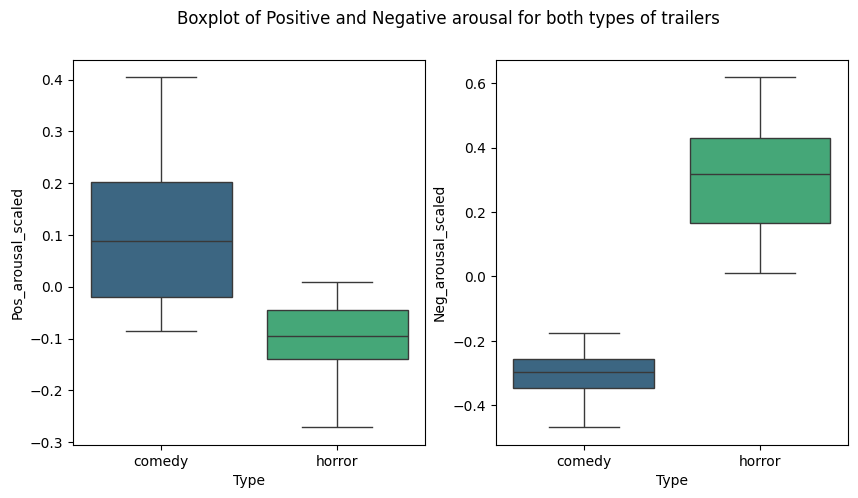

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharex=True)
fig.suptitle("Boxplot of Positive and Negative arousal for both types of trailers")
sns.boxplot(data=Aggregate_data_df, y="Pos_arousal_scaled", x="Type", palette="viridis", ax=axs[0])
sns.boxplot(data=Aggregate_data_df, y="Neg_arousal_scaled", x="Type", palette="viridis", ax=axs[1])

save_path = "/Users/luisalvarez/Documents/GitHub/RM_Thesis_Neuroforecasting/Figures/AggregateChoice/BoxOffice_PNarousal"
fig.savefig(save_path + ".png", dpi=300, bbox_inches="tight")


/var/folders/0z/1yt2h6410kb7_mgghf4q28z00000gn/T/ipykernel_18573/2472897243.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=Aggregate_data_df, y="Theaters_US_W1_num", x="Type", palette="viridis", ax=axs[0, 0])
/var/folders/0z/1yt2h6410kb7_mgghf4q28z00000gn/T/ipykernel_18573/2472897243.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=Aggregate_data_df, y="Theaters_US_M1", x="Type", palette="viridis", ax=axs[0, 1])
/var/folders/0z/1yt2h6410kb7_mgghf4q28z00000gn/T/ipykernel_18573/2472897243.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


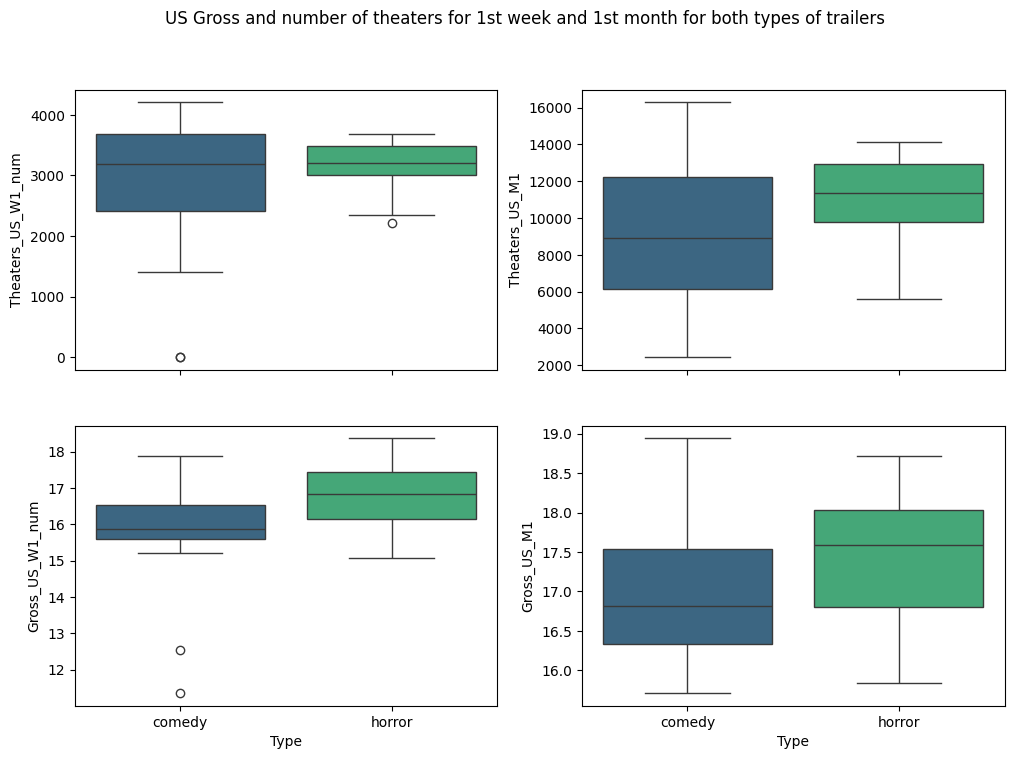

In [14]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8), sharex=True)

fig.suptitle("US Gross and number of theaters for 1st week and 1st month for both types of trailers")
sns.boxplot(data=Aggregate_data_df, y="Theaters_US_W1_num", x="Type", palette="viridis", ax=axs[0, 0])
sns.boxplot(data=Aggregate_data_df, y="Theaters_US_M1", x="Type", palette="viridis", ax=axs[0, 1])
sns.boxplot(data=Aggregate_data_df, y="Gross_US_W1_num", x="Type", palette="viridis", ax=axs[1, 0])
sns.boxplot(data=Aggregate_data_df, y="Gross_US_M1", x="Type", palette="viridis", ax=axs[1, 1])

save_path = "/Users/luisalvarez/Documents/GitHub/RM_Thesis_Neuroforecasting/Figures/AggregateChoice/BoxOffice_ByType"
fig.savefig(save_path + ".png", dpi=300, bbox_inches="tight")


The correlation between GrossOverTheaters_W1 and Pos_arousal is: -0.125 with a p-value of: 0.5106091872548513
The correlation between GrossOverTheaters_W1 and Neg_arousal is: -0.0867 with a p-value of: 0.6488649592982516

The correlation between GrossOverTheaters_M1 and Pos_arousal is: 0.0602 with a p-value of: 0.7520791606828132
The correlation between GrossOverTheaters_M1 and Neg_arousal is: 0.0394 with a p-value of: 0.8361871118399324

The correlation between Narrow_rank_W1 and Pos_arousal is: -0.063 with a p-value of: 0.7409913171584095
The correlation between Narrow_rank_W1 and Neg_arousal is: -0.1726 with a p-value of: 0.3617970983282911

The correlation between Narrow_rank_M1 and Pos_arousal is: 0.2121 with a p-value of: 0.260395229046416
The correlation between Narrow_rank_M1 and Neg_arousal is: -0.185 with a p-value of: 0.3278338344429693


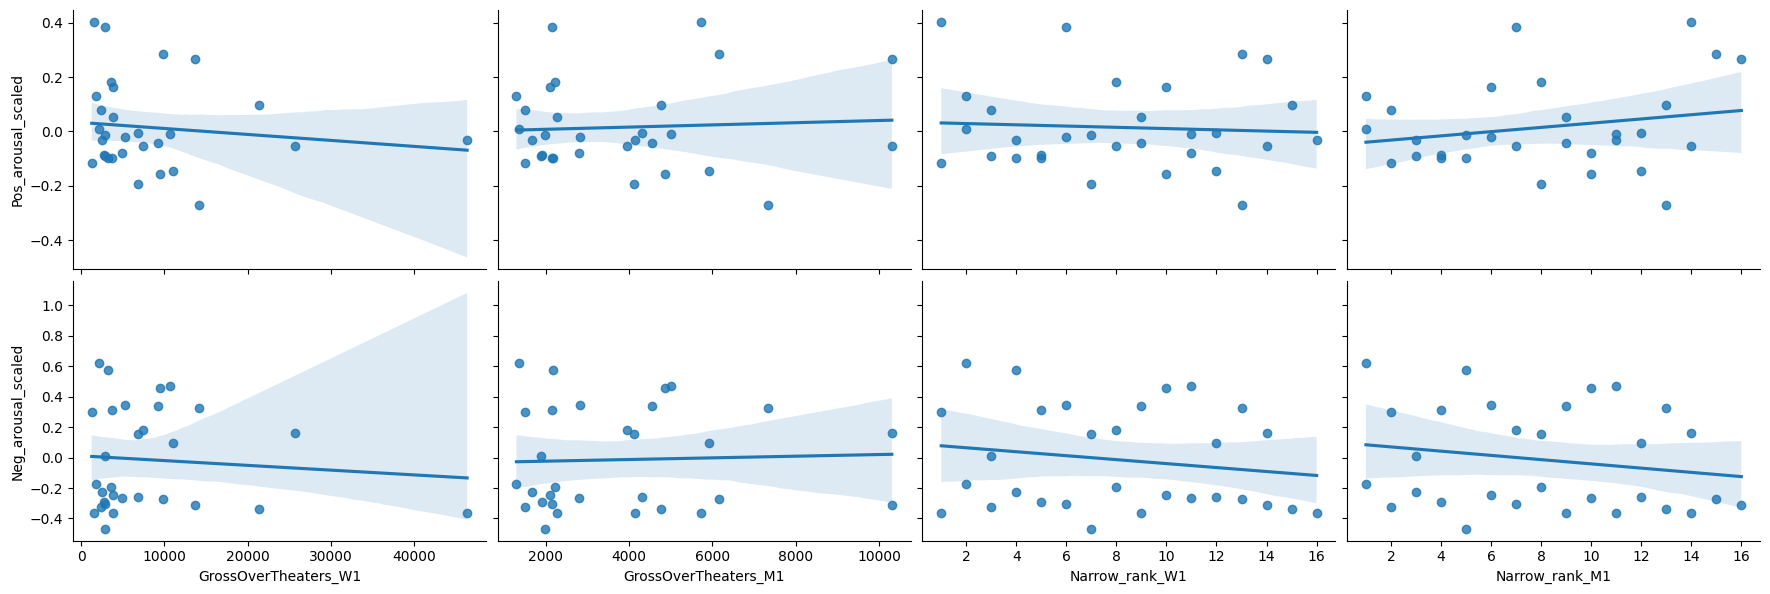

In [15]:
# Correlation between "Gross_US_W1_num" and "Gross_US_M1" and Pos_arousal and A_score and Pos_arousal for both types of trailers. 
GW_PA_All_corr = pearsonr(Aggregate_data_df["GrossOverTheaters_W1"], Aggregate_data_df["Pos_arousal_scaled"])
GW_NA_All_corr = pearsonr(Aggregate_data_df["GrossOverTheaters_W1"], Aggregate_data_df["Neg_arousal_scaled"])
GM_PA_All_corr = pearsonr(Aggregate_data_df["GrossOverTheaters_M1"], Aggregate_data_df["Pos_arousal_scaled"])
GM_NA_All_corr = pearsonr(Aggregate_data_df["GrossOverTheaters_M1"], Aggregate_data_df["Neg_arousal_scaled"])

RW_PA_All_corr = pearsonr(Aggregate_data_df["Narrow_rank_W1"], Aggregate_data_df["Pos_arousal_scaled"])
RW_NA_All_corr = pearsonr(Aggregate_data_df["Narrow_rank_W1"], Aggregate_data_df["Neg_arousal_scaled"])
RM_PA_All_corr = pearsonr(Aggregate_data_df["Narrow_rank_M1"], Aggregate_data_df["Pos_arousal_scaled"])
RM_NA_All_corr = pearsonr(Aggregate_data_df["Narrow_rank_M1"], Aggregate_data_df["Neg_arousal_scaled"])

print("The correlation between GrossOverTheaters_W1 and Pos_arousal is: " + str(round(GW_PA_All_corr[0], 4)) + " with a p-value of: " + str((GW_PA_All_corr[1])))
print("The correlation between GrossOverTheaters_W1 and Neg_arousal is: " + str(round(GW_NA_All_corr[0], 4)) + " with a p-value of: " + str((GW_NA_All_corr[1])))

print("\nThe correlation between GrossOverTheaters_M1 and Pos_arousal is: " + str(round(GM_PA_All_corr[0], 4)) + " with a p-value of: " + str((GM_PA_All_corr[1])))
print("The correlation between GrossOverTheaters_M1 and Neg_arousal is: " + str(round(GM_NA_All_corr[0], 4)) + " with a p-value of: " + str((GM_NA_All_corr[1])))

print("\nThe correlation between Narrow_rank_W1 and Pos_arousal is: " + str(round(RW_PA_All_corr[0], 4)) + " with a p-value of: " + str((RW_PA_All_corr[1])))
print("The correlation between Narrow_rank_W1 and Neg_arousal is: " + str(round(RW_NA_All_corr[0], 4)) + " with a p-value of: " + str((RW_NA_All_corr[1])))

print("\nThe correlation between Narrow_rank_M1 and Pos_arousal is: " + str(round(RM_PA_All_corr[0], 4)) + " with a p-value of: " + str((RM_PA_All_corr[1])))
print("The correlation between Narrow_rank_M1 and Neg_arousal is: " + str(round(RM_NA_All_corr[0], 4)) + " with a p-value of: " + str((RM_NA_All_corr[1])))

GW_GM_PA_NA_behavioral_plot = sns.pairplot(
    Aggregate_data_df,
    kind="reg",
    x_vars=["GrossOverTheaters_W1", "GrossOverTheaters_M1", "Narrow_rank_W1", "Narrow_rank_M1"],
    y_vars=["Pos_arousal_scaled", "Neg_arousal_scaled"],
    palette="crest",
    height=3,
    aspect=1.5)

# Add annotation to the plot. 
GW_PA_string = "r= " + str(round(GW_PA_All_corr[0], 4)) + "; p-value: " + str((GW_PA_All_corr[1]))
GW_NA_string = "r= " + str(round(GW_NA_All_corr[0], 4)) + "; p-value: " + str((GW_NA_All_corr[1]))
GM_PA_string = "r= " + str(round(GM_PA_All_corr[0], 4)) + "; p-value: " + str((GM_PA_All_corr[1]))
GM_NA_string = "r= " + str(round(GM_NA_All_corr[0], 4)) + "; p-value: " + str((GM_NA_All_corr[1]))

#GW_GM_PA_NA_behavioral_plot.axes[0, 0].text(s=GW_PA_string, x=0, y=0, fontsize=10)
#GW_GM_PA_NA_behavioral_plot.axes[0, 1].text(s=GW_NA_string, x=0, y=0, fontsize=10)
#GW_GM_PA_NA_behavioral_plot.axes[1, 0].text(s=GM_PA_string, x=0, y=0, fontsize=10)
#GW_GM_PA_NA_behavioral_plot.axes[1, 1].text(s=GM_NA_string, x=0, y=0, fontsize=10)



In [16]:
# Correlation between "Gross_US_W1_num" and Pos_arousal and Pos_arousal for comedy trailers.
GW_PA_comedy_corr = pearsonr(Aggregate_data_comedy_df["Gross_US_W1_num"], Aggregate_data_comedy_df["Pos_arousal_scaled"])
GW_NA_comedy_corr = pearsonr(Aggregate_data_comedy_df["Gross_US_W1_num"], Aggregate_data_comedy_df["Neg_arousal_scaled"])

print("The correlation between Gross_US_W1_num and Pos_arousal for comedy trailers is: " + str(round(GW_PA_comedy_corr[0], 4)) + " with a p-value of: " + str((GW_PA_comedy_corr[1])))
print("The correlation between Gross_US_W1_num and Neg_arousal for comedy trailers is: " + str(round(GW_NA_comedy_corr[0], 4)) + " with a p-value of: " + str((GW_NA_comedy_corr[1])))

# Correlation between Gross_US_W1_num and Pos_arousal and Pos_arousal for horror trailers.
GW_PA_horror_corr = pearsonr(Aggregate_data_horror_df["Gross_US_W1_num"], Aggregate_data_horror_df["Pos_arousal_scaled"])
GW_NA_horror_corr = pearsonr(Aggregate_data_horror_df["Gross_US_W1_num"], Aggregate_data_horror_df["Neg_arousal_scaled"])

print("\nThe correlation between Gross_US_W1_num and Pos_arousal for horror trailers is: " + str(round(GW_PA_horror_corr[0], 4)) + " with a p-value of: " + str((GW_PA_horror_corr[1])))
print("The correlation between Gross_US_W1_num and Neg_arousal for horror trailers is: " + str(round(GW_NA_horror_corr[0], 4)) + " with a p-value of: " + str((GW_NA_horror_corr[1])))

# Correlation between "Gross_US_M1" and Pos_arousal and Neg_arousal for comedy trailers.
GM_PA_comedy_corr = pearsonr(Aggregate_data_comedy_df["Gross_US_M1"], Aggregate_data_comedy_df["Pos_arousal_scaled"])
GM_NA_comedy_corr = pearsonr(Aggregate_data_comedy_df["Gross_US_M1"], Aggregate_data_comedy_df["Neg_arousal_scaled"])

print("\nThe correlation between Gross_US_M1 and Pos_arousal for comedy trailers is: " + str(round(GM_PA_comedy_corr[0], 4)) + " with a p-value of: " + str((GM_PA_comedy_corr[1])))
print("The correlation between Gross_US_M1 and Neg_arousal for comedy trailers is: " + str(round(GM_NA_comedy_corr[0], 4)) + " with a p-value of: " + str((GM_NA_comedy_corr[1])))

# Correlation between "Gross_US_M1" and Pos_arousal and Pos_arousal for horror trailers.
GM_PA_horror_corr = pearsonr(Aggregate_data_horror_df["Gross_US_M1"], Aggregate_data_horror_df["Pos_arousal_scaled"])
GM_NA_horror_corr = pearsonr(Aggregate_data_horror_df["Gross_US_M1"], Aggregate_data_horror_df["Neg_arousal_scaled"])

print("\nThe correlation between Gross_US_M1 and Pos_arousal for horror trailers is: " + str(round(GM_PA_horror_corr[0], 4)) + " with a p-value of: " + str((GM_PA_horror_corr[1])))
print("The correlation between Gross_US_M1 and Neg_arousal for horror trailers is: " + str(round(GM_NA_horror_corr[0], 4)) + " with a p-value of: " + str((GM_NA_horror_corr[1])))

The correlation between Gross_US_W1_num and Pos_arousal for comedy trailers is: 0.268 with a p-value of: 0.31557648220293943
The correlation between Gross_US_W1_num and Neg_arousal for comedy trailers is: 0.0581 with a p-value of: 0.8307432409197604

The correlation between Gross_US_W1_num and Pos_arousal for horror trailers is: -0.0562 with a p-value of: 0.8487532063230836
The correlation between Gross_US_W1_num and Neg_arousal for horror trailers is: -0.2454 with a p-value of: 0.3977904179949915

The correlation between Gross_US_M1 and Pos_arousal for comedy trailers is: 0.4917 with a p-value of: 0.05305399334885815
The correlation between Gross_US_M1 and Neg_arousal for comedy trailers is: -0.1074 with a p-value of: 0.6922510210298362

The correlation between Gross_US_M1 and Pos_arousal for horror trailers is: -0.1618 with a p-value of: 0.5805768706408528
The correlation between Gross_US_M1 and Neg_arousal for horror trailers is: -0.3163 with a p-value of: 0.27057780903429507


In [17]:

""" 



GW_GM_PA_NA_bothTrailers_behavioral_plot = sns.pairplot(
    Aggregate_data_df,
    kind="reg",
    x_vars=["Pos_arousal_scaled", "Neg_arousal_scaled"],
    y_vars=["Gross_US_W1_num", "Gross_US_M1"], 
    palette="crest",
    hue="Type",
    height=4,
    aspect=1.7)

# Add annotation to the plot.
GW_comedy_PA_string = "C r= " + str(round(GW_PA_comedy_corr[0], 4)) + "; p-value: " + str((GW_PA_comedy_corr[1]))
GW_horror_PA_string = "H r= " + str(round(GW_PA_horror_corr[0], 4)) + "; p-value: " + str((GW_PA_horror_corr[1]))

GM_comedy_PA_string = "C r= " + str(round(GM_PA_comedy_corr[0], 4)) + "; p-value: " + str((GM_PA_comedy_corr[1]))
GM_horror_PA_string = "H r= " + str(round(GM_PA_horror_corr[0], 4)) + "; p-value: " + str((GM_PA_horror_corr[1]))

GW_comedy_NA_string = "C r= " + str(round(GW_NA_comedy_corr[0], 4)) + "; p-value: " + str((GW_NA_comedy_corr[1]))
GW_horror_NA_string = "H r= " + str(round(GW_NA_horror_corr[0], 4)) + "; p-value: " + str((GW_NA_horror_corr[1]))

GM_comedy_NA_string = "C r= " + str(round(GM_NA_comedy_corr[0], 4)) + "; p-value: " + str((GM_NA_comedy_corr[1]))
GM_horror_NA_string = "H r= " + str(round(GM_NA_horror_corr[0], 4)) + "; p-value: " + str((GM_NA_horror_corr[1]))

GW_GM_PA_NA_bothTrailers_behavioral_plot.axes[0, 0].text(s=GW_comedy_PA_string, x=0, y=0, fontsize=10)
GW_GM_PA_NA_bothTrailers_behavioral_plot.axes[0, 0].text(s=GW_horror_PA_string, x=0, y=5000000, fontsize=10)

GW_GM_PA_NA_bothTrailers_behavioral_plot.axes[0, 1].text(s=GM_comedy_NA_string, x=0, y=0, fontsize=10)
GW_GM_PA_NA_bothTrailers_behavioral_plot.axes[0, 1].text(s=GM_horror_NA_string, x=0, y=5000000, fontsize=10)

GW_GM_PA_NA_bothTrailers_behavioral_plot.axes[1, 0].text(s=GM_comedy_PA_string, x=0, y=-0, fontsize=10)
GW_GM_PA_NA_bothTrailers_behavioral_plot.axes[1, 0].text(s=GM_horror_PA_string, x=0, y=10000000, fontsize=10)

GW_GM_PA_NA_bothTrailers_behavioral_plot.axes[1, 1].text(s=GM_comedy_NA_string, x=0, y=0, fontsize=10)
GW_GM_PA_NA_bothTrailers_behavioral_plot.axes[1, 1].text(s=GM_horror_NA_string, x=0, y=10000000, fontsize=10)

"""




' \n\n\n\nGW_GM_PA_NA_bothTrailers_behavioral_plot = sns.pairplot(\n    Aggregate_data_df,\n    kind="reg",\n    x_vars=["Pos_arousal_scaled", "Neg_arousal_scaled"],\n    y_vars=["Gross_US_W1_num", "Gross_US_M1"], \n    palette="crest",\n    hue="Type",\n    height=4,\n    aspect=1.7)\n\n# Add annotation to the plot.\nGW_comedy_PA_string = "C r= " + str(round(GW_PA_comedy_corr[0], 4)) + "; p-value: " + str((GW_PA_comedy_corr[1]))\nGW_horror_PA_string = "H r= " + str(round(GW_PA_horror_corr[0], 4)) + "; p-value: " + str((GW_PA_horror_corr[1]))\n\nGM_comedy_PA_string = "C r= " + str(round(GM_PA_comedy_corr[0], 4)) + "; p-value: " + str((GM_PA_comedy_corr[1]))\nGM_horror_PA_string = "H r= " + str(round(GM_PA_horror_corr[0], 4)) + "; p-value: " + str((GM_PA_horror_corr[1]))\n\nGW_comedy_NA_string = "C r= " + str(round(GW_NA_comedy_corr[0], 4)) + "; p-value: " + str((GW_NA_comedy_corr[1]))\nGW_horror_NA_string = "H r= " + str(round(GW_NA_horror_corr[0], 4)) + "; p-value: " + str((GW_NA_horr

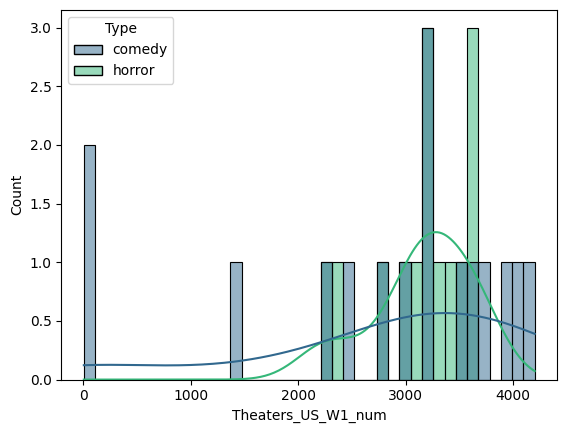

In [18]:
hist = sns.histplot(data=Aggregate_data_df, x="Theaters_US_W1_num", hue="Type", kde=True, palette="viridis", bins=40)
plt.rc('legend', title_fontsize=10, markerscale=1)




## Neural Activation Whole Average 

The correlation between NAcc_whole activation and first week gross for Comedy trailers is: 0.45871 with a p-value of: 0.07391896967515171
The correlation between AIns_whole activation and first week gross for Comedy trailers is: 0.4361 with a p-value of: 0.09128208128866831
The correlation between MPFC_whole activation and first week gross for Comedy trailers is: 0.25649 with a p-value of: 0.3376049130256032

The correlation between NAcc_whole activation and first month gross for Comedy trailers is: 0.20959 with a p-value of: 0.435947138740906
The correlation between AIns_whole activation and first month gross for Comedy trailers is: 0.39859 with a p-value of: 0.12621032275911212
The correlation between MPFC_whole activation and first month gross for Comedy trailers is: 0.07083 with a p-value of: 0.7943471660142665

The correlation between NAcc_whole activation and first week gross for Horror trailers is: -0.28541 with a p-value of: 0.322603054367058
The correlation between AIns_whole 

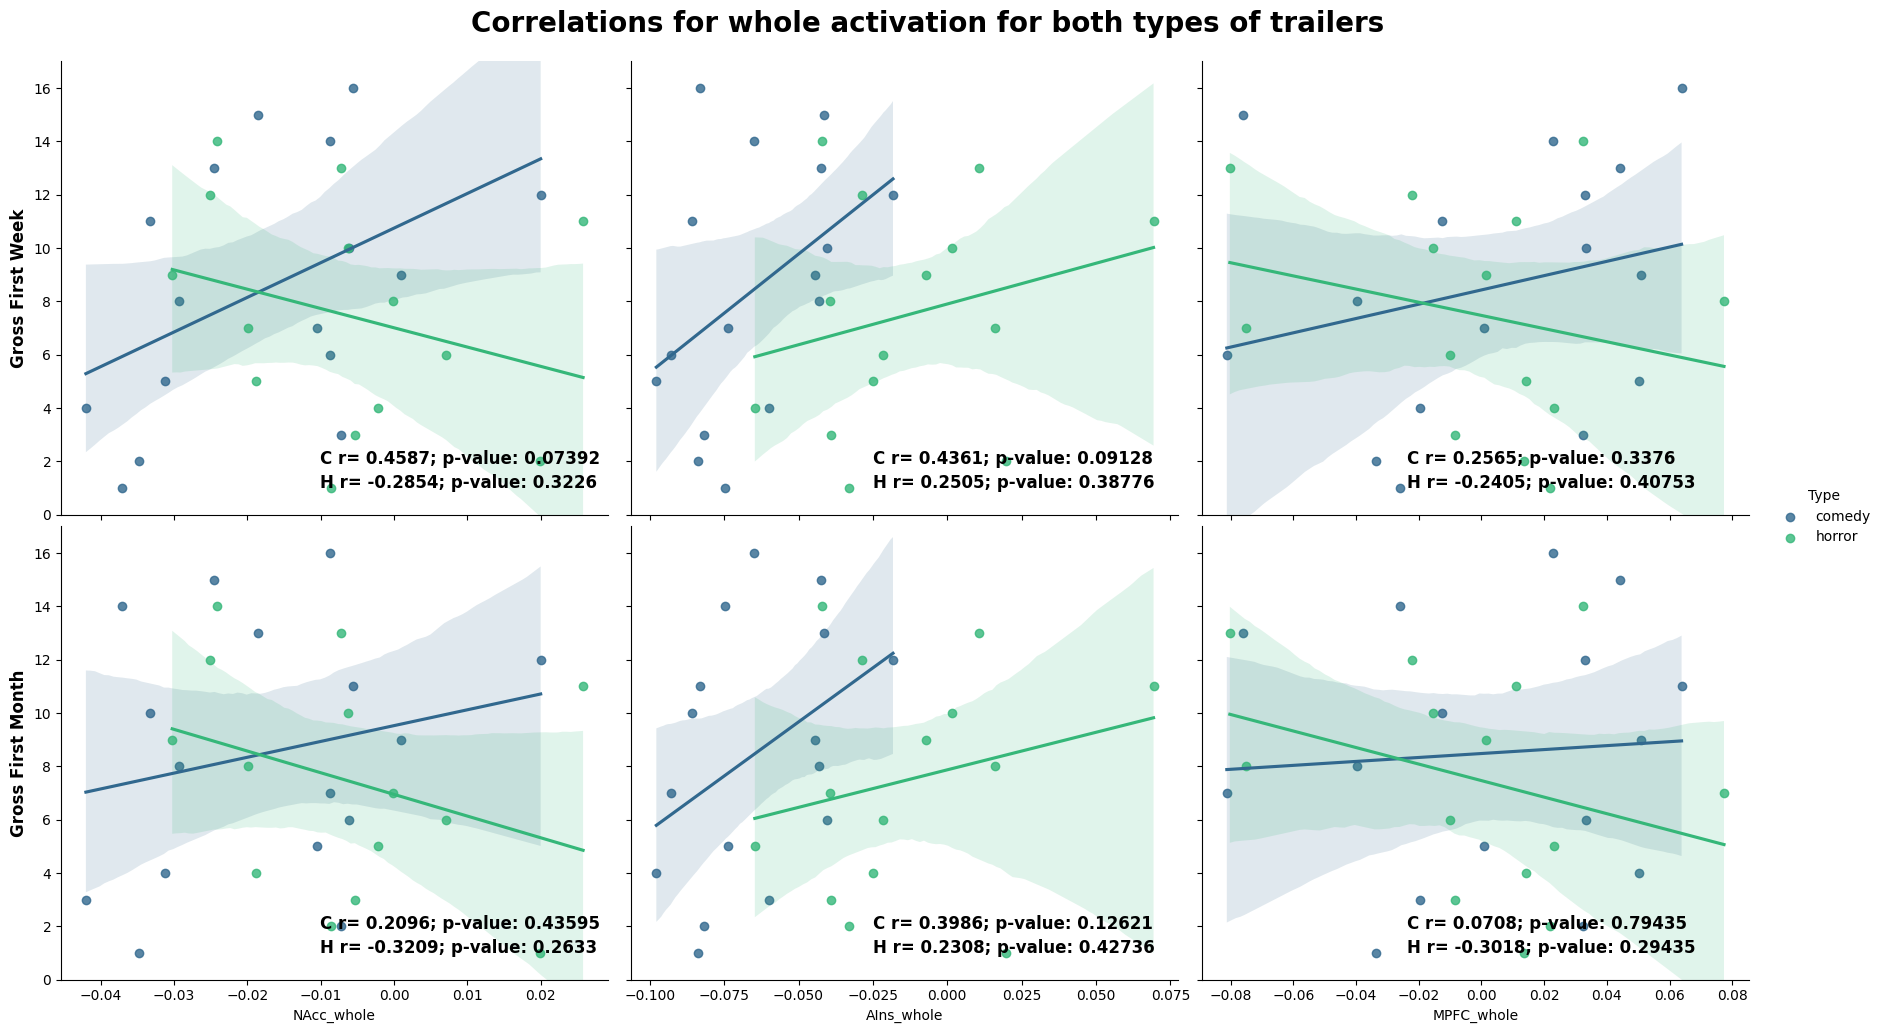

In [19]:

compute_and_plot_both_corrs(Aggregate_data_df, Aggregate_data_comedy_df, Aggregate_data_horror_df, "whole", "Correlations for whole activation for both types of trailers")


## Neural Activation Offset 

In [20]:
#offset_title = "Correlations for offset activation for both types of trailers"
#compute_and_plot_corrs(all_subs_events_df, "offset", offset_title)

The correlation between NAcc_offset activation and first week gross for Comedy trailers is: 0.06017 with a p-value of: 0.8248156339133607
The correlation between AIns_offset activation and first week gross for Comedy trailers is: 0.20447 with a p-value of: 0.44748677433156825
The correlation between MPFC_offset activation and first week gross for Comedy trailers is: 0.18964 with a p-value of: 0.48177800123214626

The correlation between NAcc_offset activation and first month gross for Comedy trailers is: -0.26754 with a p-value of: 0.31645675213743496
The correlation between AIns_offset activation and first month gross for Comedy trailers is: -0.11271 with a p-value of: 0.6777013464988662
The correlation between MPFC_offset activation and first month gross for Comedy trailers is: -0.25774 with a p-value of: 0.33516743136820015

The correlation between NAcc_offset activation and first week gross for Horror trailers is: -0.1111 with a p-value of: 0.7053545073000118
The correlation betwee

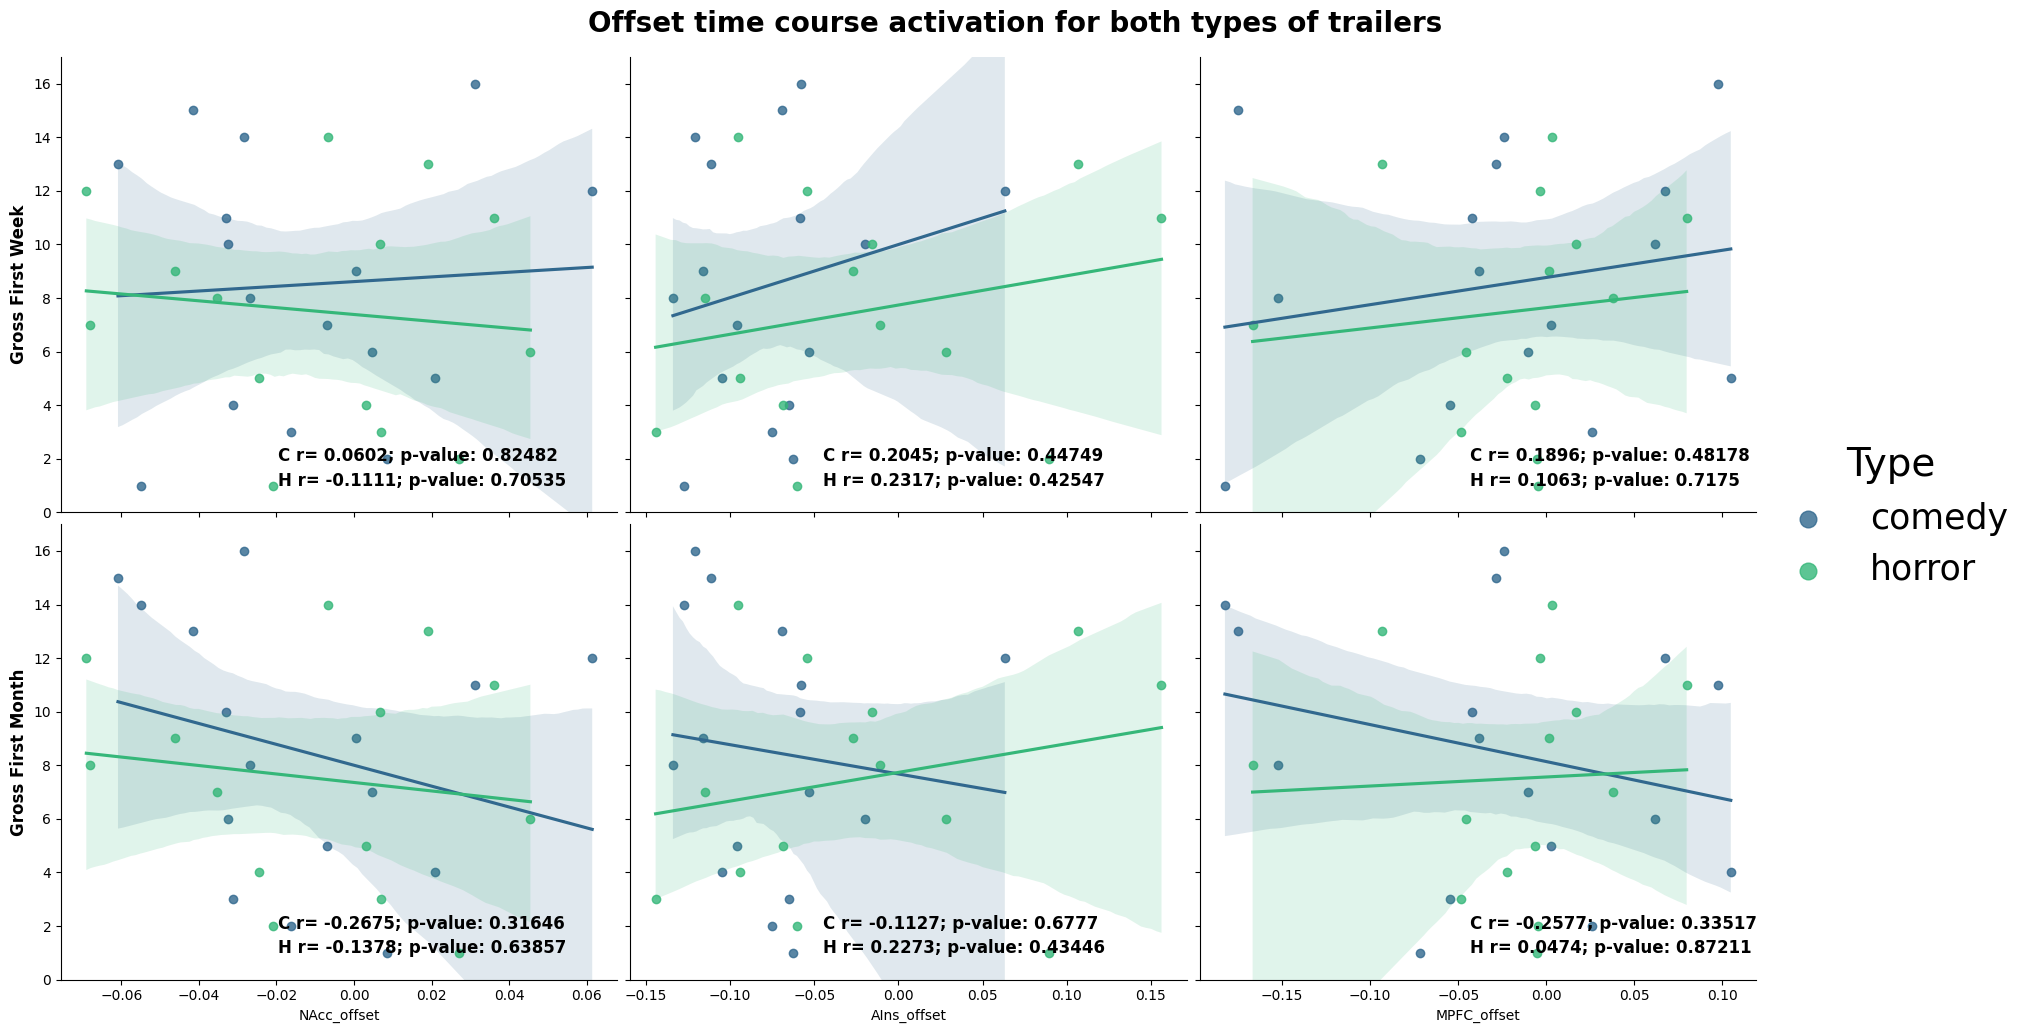

In [21]:
offset_title = 'Offset time course activation for both types of trailers'
compute_and_plot_both_corrs(Aggregate_data_df, Aggregate_data_comedy_df, Aggregate_data_horror_df, "offset", offset_title)


# Neural activation middle

In [22]:
#middle_title = "Correlations for middle activation for both types of trailers"
#compute_and_plot_corrs(all_subs_events_df, "middle", middle_title)

The correlation between NAcc_middle activation and first week gross for Comedy trailers is: 0.09645 with a p-value of: 0.7223464414521666
The correlation between AIns_middle activation and first week gross for Comedy trailers is: 0.11642 with a p-value of: 0.6676656010952042
The correlation between MPFC_middle activation and first week gross for Comedy trailers is: -0.0211 with a p-value of: 0.9381710166174348

The correlation between NAcc_middle activation and first month gross for Comedy trailers is: -0.12003 with a p-value of: 0.657930755662098
The correlation between AIns_middle activation and first month gross for Comedy trailers is: 0.36351 with a p-value of: 0.16635618760797152
The correlation between MPFC_middle activation and first month gross for Comedy trailers is: 0.06079 with a p-value of: 0.8230241861364194

The correlation between NAcc_middle activation and first week gross for Horror trailers is: -0.20815 with a p-value of: 0.4751723132751104
The correlation between AIn

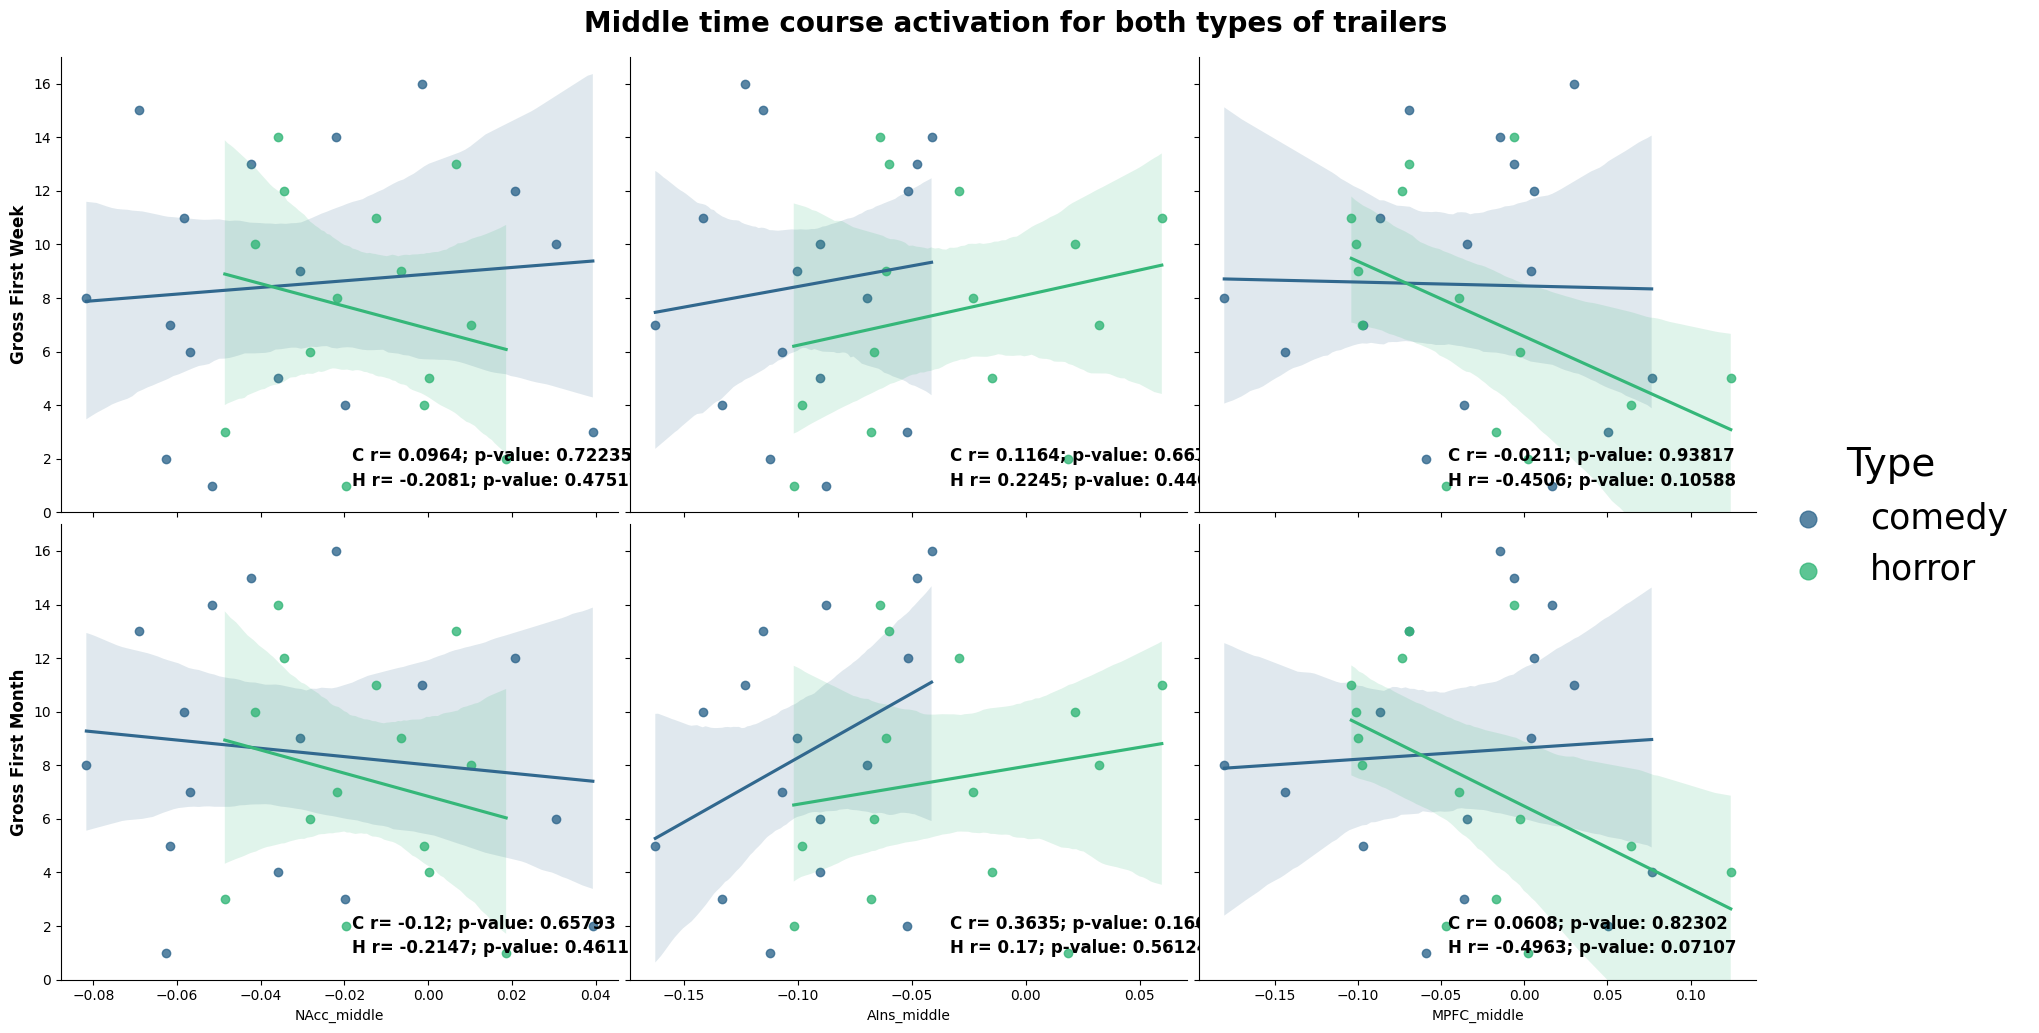

In [23]:
middle_title = 'Middle time course activation for both types of trailers'
compute_and_plot_both_corrs(Aggregate_data_df, Aggregate_data_comedy_df, Aggregate_data_horror_df, "middle", middle_title)

## Neural activation onset

In [24]:
#onset_title = "Correlations for onset activation for both types of trailers"
#compute_and_plot_corrs(all_subs_events_df, "onset", onset_title)

The correlation between NAcc_onset activation and first week gross for Comedy trailers is: 0.41911 with a p-value of: 0.10611785458798226
The correlation between AIns_onset activation and first week gross for Comedy trailers is: 0.24249 with a p-value of: 0.3655240248347507
The correlation between MPFC_onset activation and first week gross for Comedy trailers is: 0.25043 with a p-value of: 0.34952976560357873

The correlation between NAcc_onset activation and first month gross for Comedy trailers is: 0.56547 with a p-value of: 0.02243920821988338
The correlation between AIns_onset activation and first month gross for Comedy trailers is: 0.30261 with a p-value of: 0.2546094464766184
The correlation between MPFC_onset activation and first month gross for Comedy trailers is: 0.36155 with a p-value of: 0.16882968123642744

The correlation between NAcc_onset activation and first week gross for Horror trailers is: -0.17692 with a p-value of: 0.5451297165322365
The correlation between AIns_on

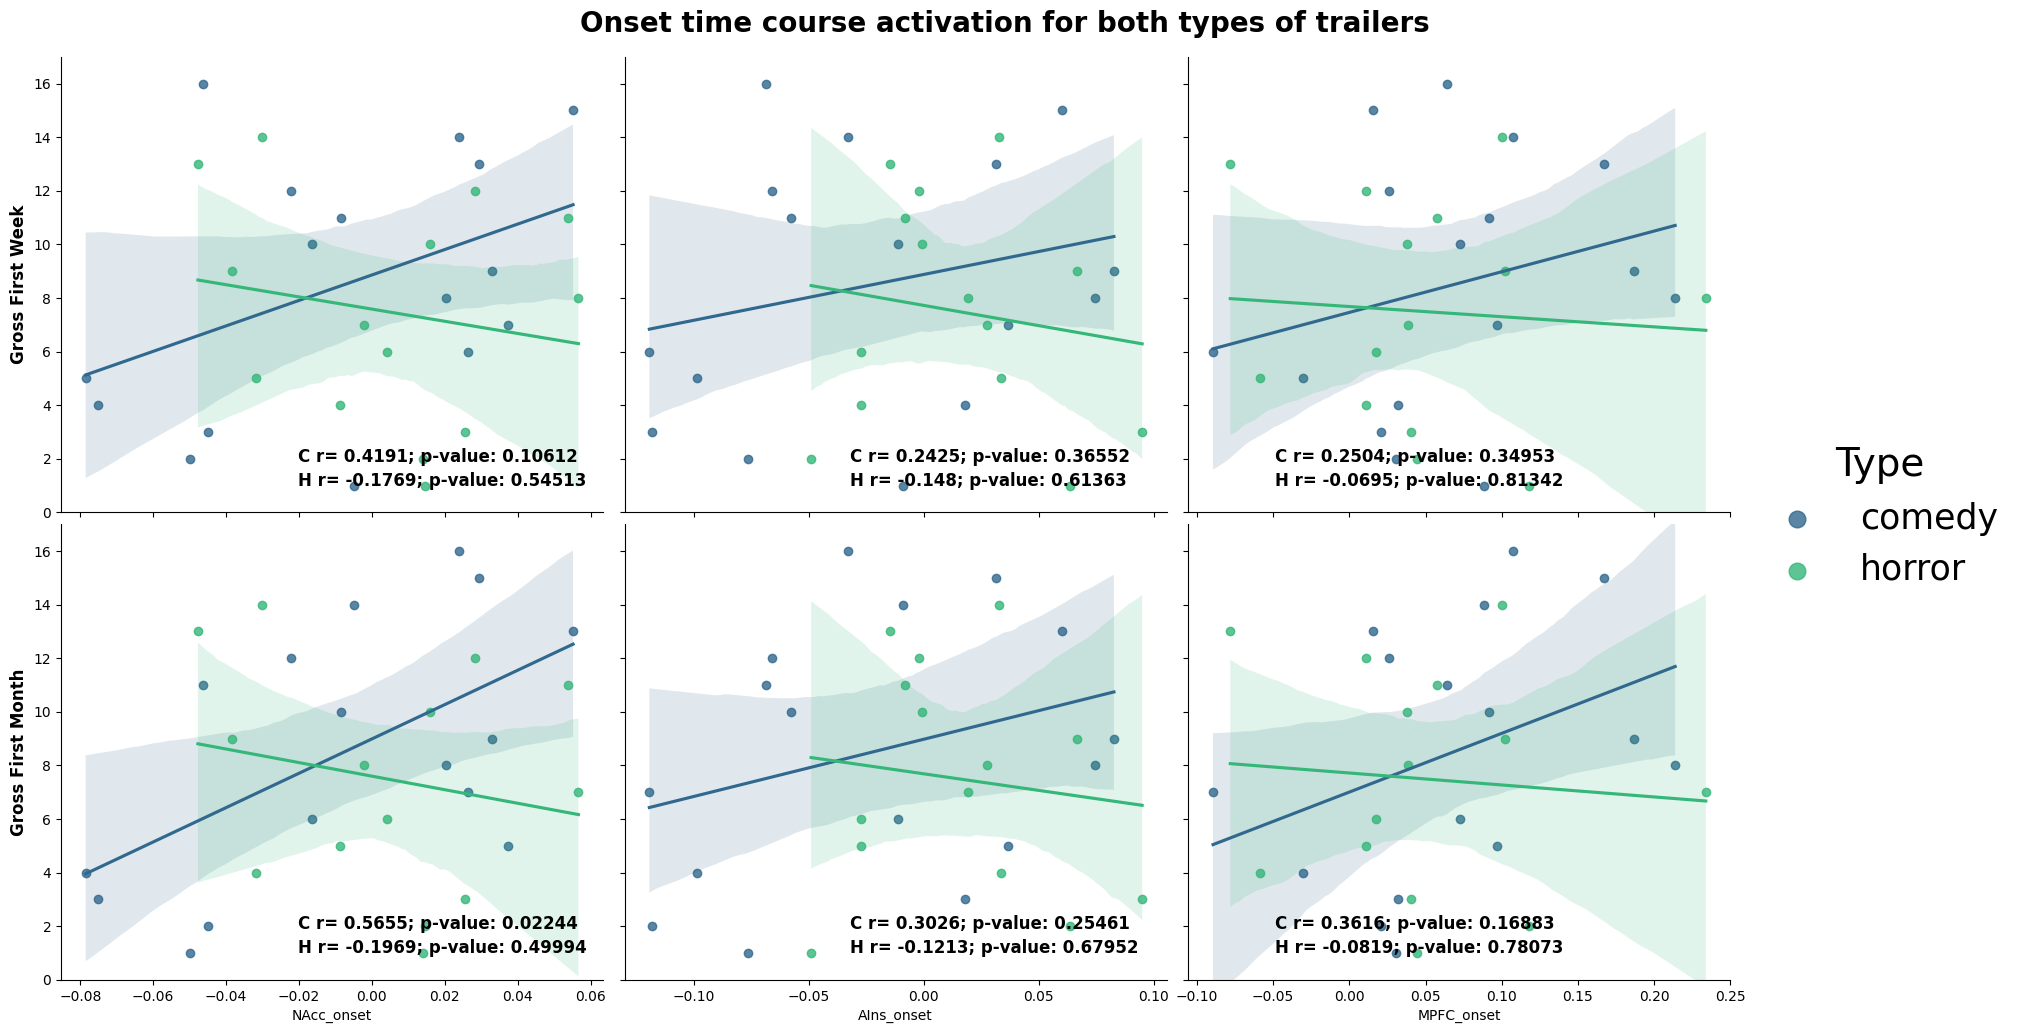

In [25]:
onset_title = 'Onset time course activation for both types of trailers'
compute_and_plot_both_corrs(Aggregate_data_df, Aggregate_data_comedy_df, Aggregate_data_horror_df, "onset", onset_title)

## Neural ISC

In [26]:
"""


# Correlation with Positive Arousal.
NAcc_PA_ISC_All_corr = pearsonr(Aggregate_data_df["NAcc_ISC"], Aggregate_data_df["Pos_arousal_scaled"])
AIns_PA_ISC_All_corr = pearsonr(Aggregate_data_df["AIns_ISC"], Aggregate_data_df["Pos_arousal_scaled"])
MPFC_PA_ISC_All_corr = pearsonr(Aggregate_data_df["MPFC_ISC"], Aggregate_data_df["Pos_arousal_scaled"])

# Correlation with Negative Arousal.
NAcc_NA_ISC_All_corr = pearsonr(Aggregate_data_df["NAcc_ISC"], Aggregate_data_df["Neg_arousal_scaled"])
AIns_NA_ISC_All_corr = pearsonr(Aggregate_data_df["AIns_ISC"], Aggregate_data_df["Neg_arousal_scaled"])
MPFC_NA_ISC_All_corr = pearsonr(Aggregate_data_df["MPFC_ISC"], Aggregate_data_df["Neg_arousal_scaled"])

print("For both types of trailers, the correlation between NAcc ISC activation and positive arousal is: " + str(round(NAcc_PA_ISC_All_corr[0], 5)) + " with a p-value of: " + str((NAcc_PA_ISC_All_corr[1])))
print("For both types of trailers, the correlation between AIns ISC activation and positive arousal is: " + str(round(AIns_PA_ISC_All_corr[0], 5)) + " with a p-value of: " + str((AIns_PA_ISC_All_corr[1])))
print("For both types of trailers, the correlation between MPFC ISC activation and positive arousal is: " + str(round(MPFC_PA_ISC_All_corr[0], 5)) + " with a p-value of: " + str((MPFC_PA_ISC_All_corr[1])))

print("\nFor both types of trailers, the correlation between NAcc ISC activation and negative arousal is: " + str(round(NAcc_NA_ISC_All_corr[0], 5)) + " with a p-value of: " + str((NAcc_NA_ISC_All_corr[1])))
print("For both types of trailers, the correlation between AIns ISC activation and negative arousal is: " + str(round(AIns_NA_ISC_All_corr[0], 5)) + " with a p-value of: " + str((AIns_NA_ISC_All_corr[1])))
print("For both types of trailers, the correlation between MPFC ISC activation and negative arousal is: " + str(round(MPFC_NA_ISC_All_corr[0], 5)) + " with a p-value of: " + str((MPFC_NA_ISC_All_corr[1])))

print("\nFor both types of trailers, the correlation between NAcc ISC activation and watch scores is: " + str(round(NAcc_W_ISC_All_corr[0], 5)) + " with a p-value of: " + str((NAcc_W_ISC_All_corr[1])))
print("For both types of trailers, the correlation between AIns ISC activation and watch scores is: " + str(round(AIns_W_ISC_All_corr[0], 5)) + " with a p-value of: " + str((AIns_W_ISC_All_corr[1])))
print("For both types of trailers, the correlation between MPFC ISC activation and watch scores is: " + str(round(MPFC_W_ISC_All_corr[0], 5)) + " with a p-value of: " + str((MPFC_W_ISC_All_corr[1])))

"""

'\n\n\n# Correlation with Positive Arousal.\nNAcc_PA_ISC_All_corr = pearsonr(Aggregate_data_df["NAcc_ISC"], Aggregate_data_df["Pos_arousal_scaled"])\nAIns_PA_ISC_All_corr = pearsonr(Aggregate_data_df["AIns_ISC"], Aggregate_data_df["Pos_arousal_scaled"])\nMPFC_PA_ISC_All_corr = pearsonr(Aggregate_data_df["MPFC_ISC"], Aggregate_data_df["Pos_arousal_scaled"])\n\n# Correlation with Negative Arousal.\nNAcc_NA_ISC_All_corr = pearsonr(Aggregate_data_df["NAcc_ISC"], Aggregate_data_df["Neg_arousal_scaled"])\nAIns_NA_ISC_All_corr = pearsonr(Aggregate_data_df["AIns_ISC"], Aggregate_data_df["Neg_arousal_scaled"])\nMPFC_NA_ISC_All_corr = pearsonr(Aggregate_data_df["MPFC_ISC"], Aggregate_data_df["Neg_arousal_scaled"])\n\nprint("For both types of trailers, the correlation between NAcc ISC activation and positive arousal is: " + str(round(NAcc_PA_ISC_All_corr[0], 5)) + " with a p-value of: " + str((NAcc_PA_ISC_All_corr[1])))\nprint("For both types of trailers, the correlation between AIns ISC activati

The correlation between NAcc_ISC activation and first week gross for Comedy trailers is: 0.19794 with a p-value of: 0.46243609416041986
The correlation between AIns_ISC activation and first week gross for Comedy trailers is: 0.06941 with a p-value of: 0.7983948522799651
The correlation between MPFC_ISC activation and first week gross for Comedy trailers is: -0.17182 with a p-value of: 0.5245887186685251

The correlation between NAcc_ISC activation and first month gross for Comedy trailers is: 0.20678 with a p-value of: 0.44226666271296483
The correlation between AIns_ISC activation and first month gross for Comedy trailers is: -0.04305 with a p-value of: 0.8742064490089521
The correlation between MPFC_ISC activation and first month gross for Comedy trailers is: -0.00992 with a p-value of: 0.9709273372877414

The correlation between NAcc_ISC activation and first week gross for Horror trailers is: 0.46922 with a p-value of: 0.09052777709775485
The correlation between AIns_ISC activation 

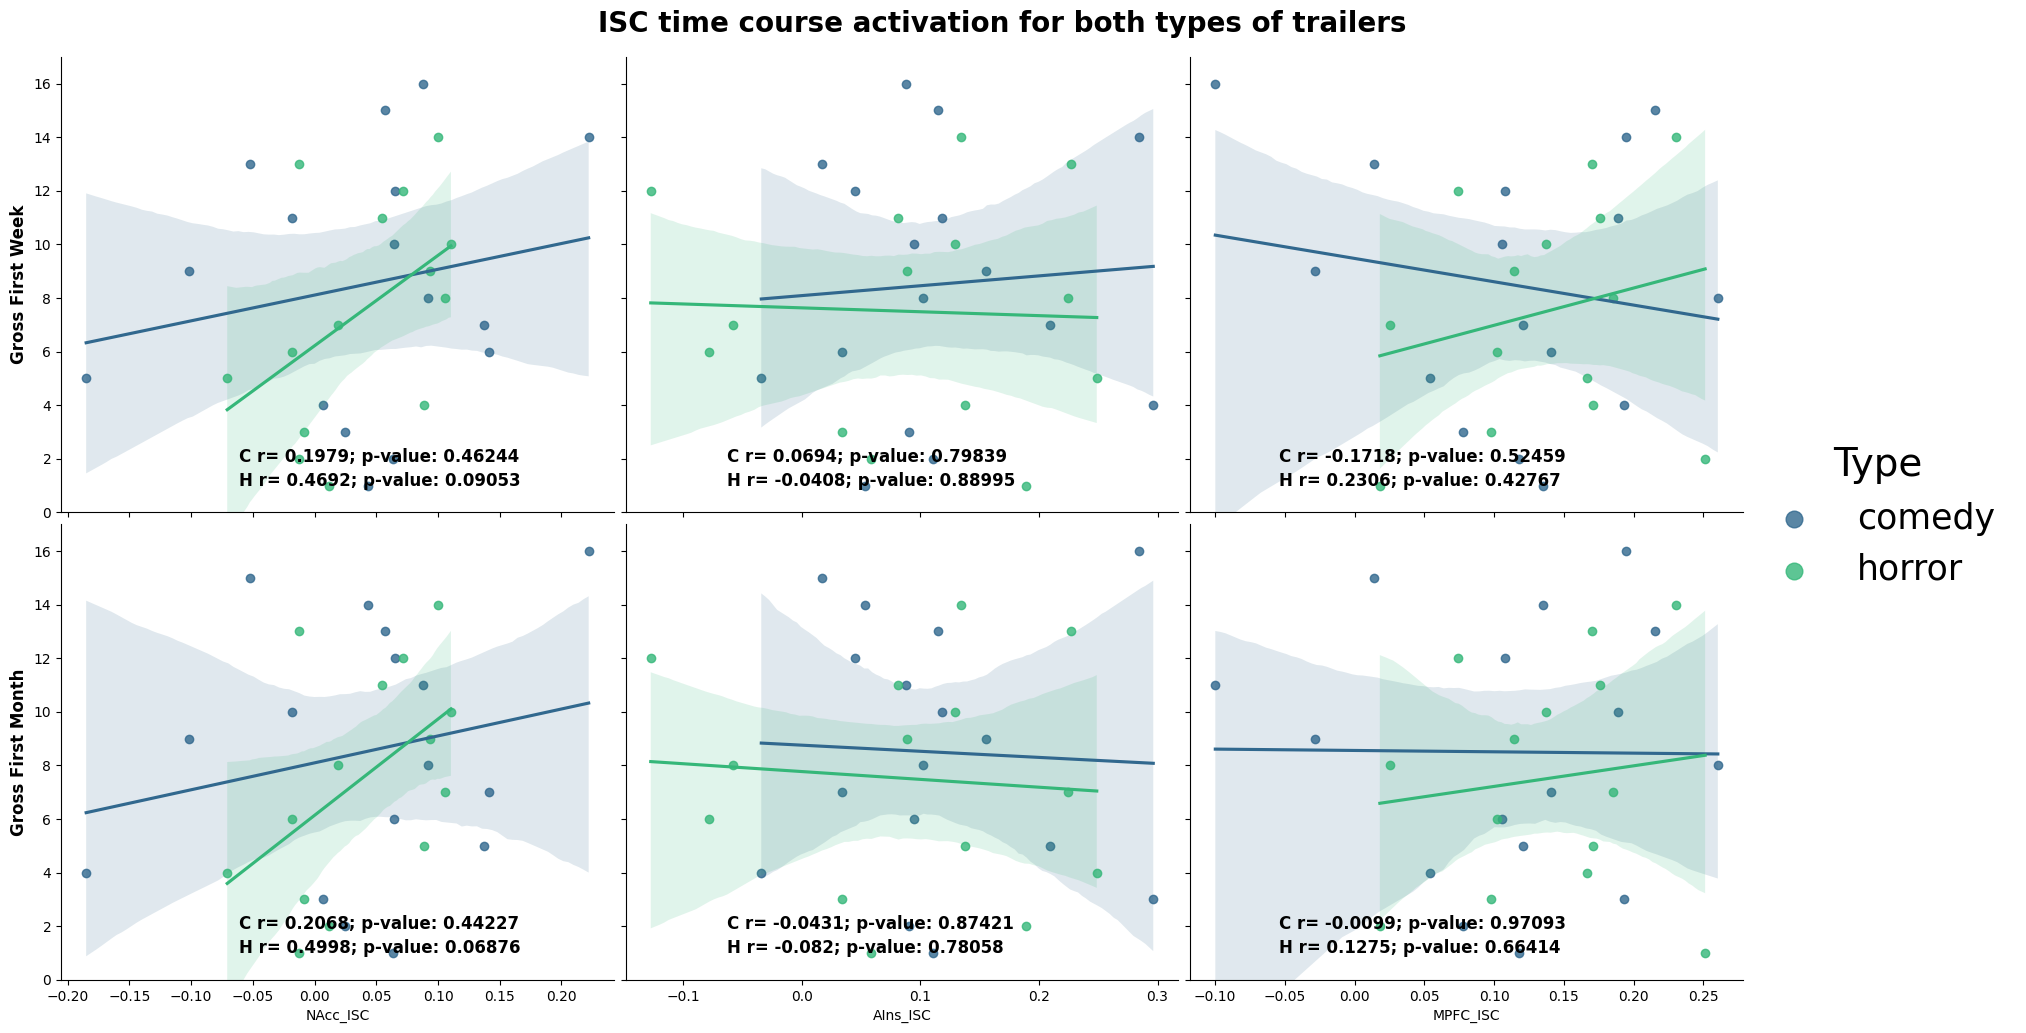

In [39]:

onset_title = 'ISC time course activation for both types of trailers'
compute_and_plot_both_corrs(Aggregate_data_df, Aggregate_data_comedy_df, Aggregate_data_horror_df, "ISC", onset_title)




# Visualize ...

In [28]:
# Define the relevant columns for the analysis.
relevant_cols = ['Pos_arousal_scaled', 'Neg_arousal_scaled', 'W_score_scaled', 'Gross_US_W1_num', 'Gross_US_W2_num',
       'Gross_US_W3_num', 'Gross_US_W4_num', 'Gross_Total_US',
       'Released_Month', 'Budget', 'IMDb_rating',
       'IMDb_vote', 'Gross_US_M1', 'GrossOverTheaters_W1']

"""
'Theaters_US_W4_num', 'Total_Theaters_US', 'Gross_World_num', 'Theaters_US_M1',
'NAcc_onset', 'Theaters_US_W1_num', 'Theaters_US_W2_num', 'Theaters_US_W3_num',
'AIns_onset', 'MPFC_onset', 'NAcc_middle', 'AIns_middle', 'MPFC_middle',
'NAcc_offset', 'AIns_offset', 'MPFC_offset', 'NAcc_whole', 'AIns_whole', 'MPFC_whole', 
'NAcc_ISC', 'AIns_ISC', 'MPFC_ISC', 'Total_weeks', 'Weeks_avg_per_theater', GrossOverTheaters_M1'
"""

# Filter the columns in the dataframe.
Aggregate_data_filtered_df = Aggregate_data_df[relevant_cols]
Aggregate_data_filtered_df = Aggregate_data_filtered_df.dropna()
Aggregate_data_comedy_filtered_df = Aggregate_data_comedy_df[relevant_cols]
Aggregate_data_horror_filtered_df = Aggregate_data_horror_df[relevant_cols]


# Compute the correlation matrix for the filtered dataframe.
Aggregate_data_corrs_filtered = Aggregate_data_filtered_df.corr()
Aggregate_data_comedy_corrs_filtered = Aggregate_data_comedy_filtered_df.corr()
Aggregate_data_horror_corrs_filtered = Aggregate_data_horror_filtered_df.corr()


<Axes: >

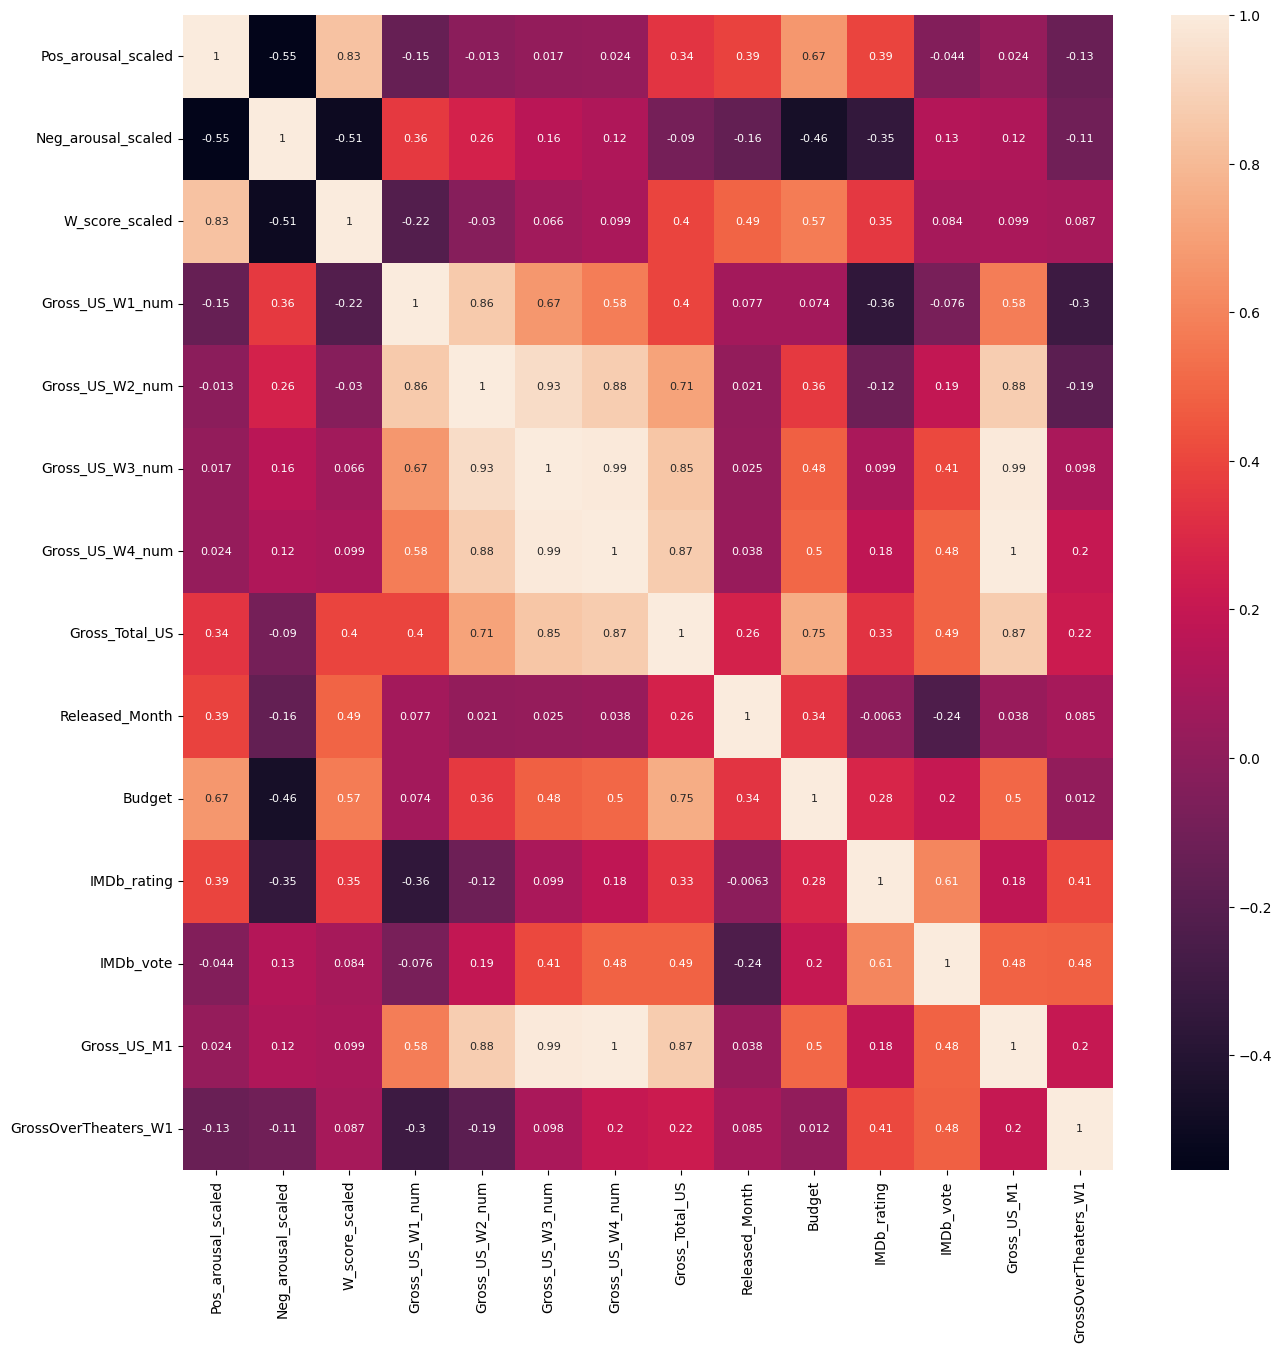

In [29]:
# Create heapmap to see correlations across all variables. 

fig, axs = plt.subplots(1, 1, figsize=(15, 15), sharex=False) 

sns.heatmap(Aggregate_data_corrs_filtered, ax=axs, annot=True, annot_kws={'size': 8})


<Axes: >

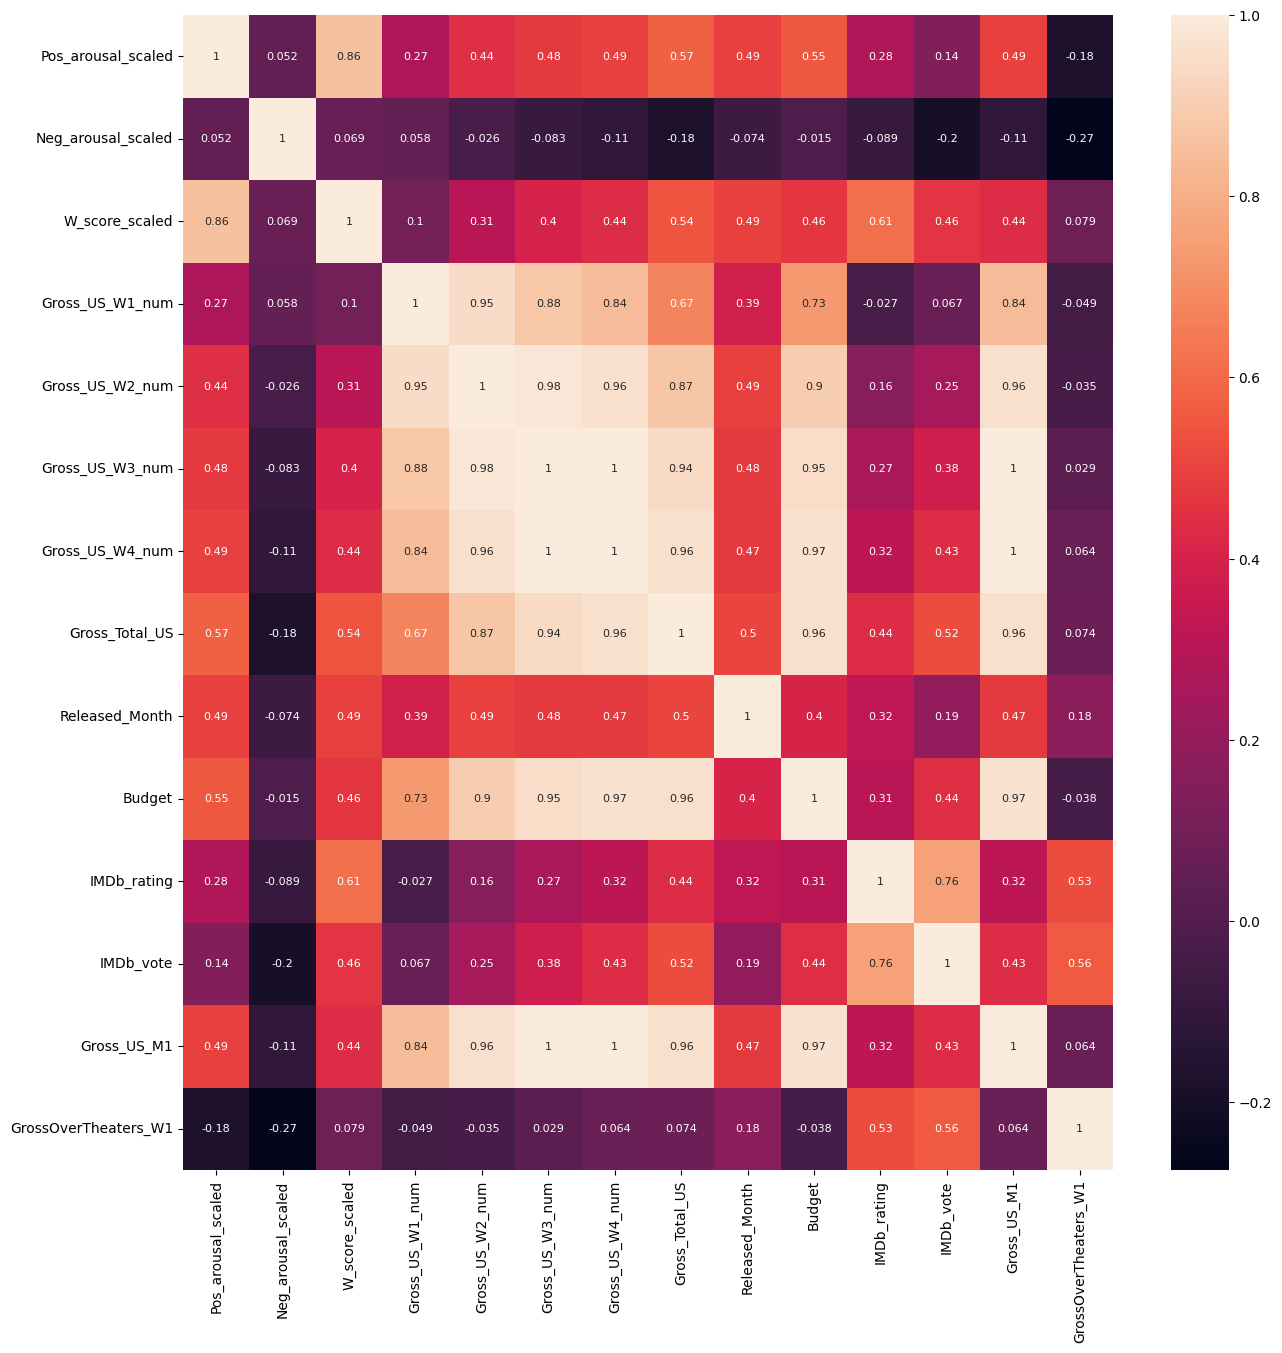

In [30]:

fig, axs = plt.subplots(1, 1, figsize=(15, 15), sharex=False) 

sns.heatmap(Aggregate_data_comedy_corrs_filtered, ax=axs, annot=True, annot_kws={'size': 8})

<Axes: >

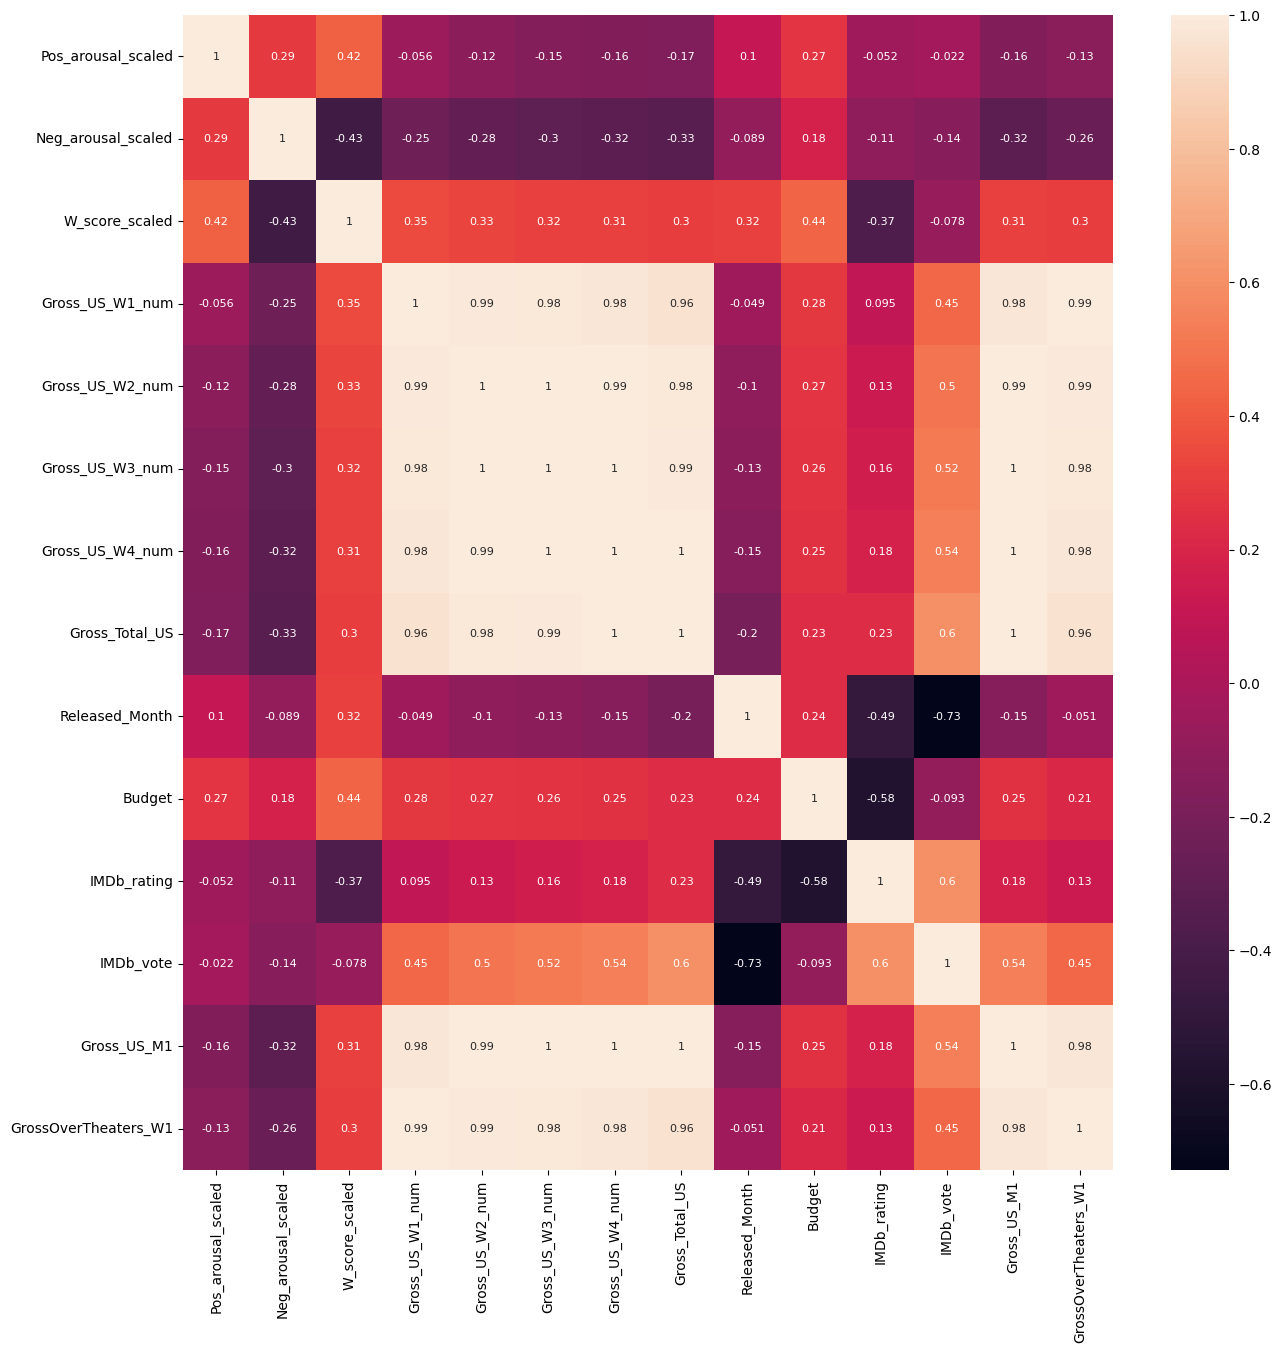

In [31]:

fig, axs = plt.subplots(1, 1, figsize=(15, 15), sharex=False) 

sns.heatmap(Aggregate_data_horror_corrs_filtered, ax=axs, annot=True, annot_kws={'size': 8})

In [32]:
# # Open a datasets directory. 
# fd = os.open("/Users/luisalvarez/Documents/GitHub/RM_Thesis_Neuroforecasting/ProcessedData", os.O_RDONLY)


# # Use os.fchdir() method to change the current dir/folder.
# os.fchdir(fd)

# # Safe check- Print current working directory
# print("Current working dir : %s" % os.getcwd())

# root_path = os.getcwd()

In [33]:
"""

# After dropping outliers from the neural activation data, save the new dataframe to a csv file.
# Calculate the mean measures for each trailer accross participants.
aggregate_df = all_subs_events_df.groupby("Trailer", as_index=False, dropna=False).mean()
aggregate_df.reset_index(inplace=True)

type_list = []
for id_trailer in range(len(aggregate_df)):
    if "c" in aggregate_df["Trailer"][id_trailer]:
        type_list.append("comedy")
    else:
        type_list.append("horror")

aggregate_df["Type"] = type_list

# I'm not sure why, but I am loosing the 'W_score' column. 
# I will add it back to the dataframe.
w_scores_dict = {}
for trailer_id in all_subs_events_df["Trailer"].unique():
    current_trailer_mean_w_score = all_subs_events_df[all_subs_events_df["Trailer"] == trailer_id]["W_score"].mean()
    w_scores_dict[trailer_id] = current_trailer_mean_w_score
    # Print scores as a sanity check.
    #print("For current trailer: " + trailer_id + " the mean W_score is: " + str(current_trailer_mean_w_score))

w_scores_list = []
for trailer_id in aggregate_df["Trailer"].unique():
    w_scores_list.append(w_scores_dict[trailer_id])

aggregate_df["W_score"] = w_scores_list


# Re-order columns.
cols_ordered = ['Trailer', 'Type', 'Onset', 'Offset', 'Pos_arousal', 'Neg_arousal',
        'Pos_arousal_scaled', 'Neg_arousal_scaled', 'W_score', 'W_score_scaled',
        'NAcc_onset', 'AIns_onset', 'MPFC_onset',
        'NAcc_middle', 'AIns_middle', 'MPFC_middle', 'NAcc_offset',
        'AIns_offset', 'MPFC_offset', 
        'NAcc_onset_z', 'AIns_onset_z', 'MPFC_onset_z', 'NAcc_middle_z',
        'AIns_middle_z', 'MPFC_middle_z', 'NAcc_offset_z', 'AIns_offset_z',
        'MPFC_offset_z', 'NAcc_whole', 'AIns_whole', 'MPFC_whole',
        'NAcc_whole_z', 'AIns_whole_z', 'MPFC_whole_z', 'NAcc_pos_peak',
        'AIns_pos_peak', 'MPFC_pos_peak', 'NAcc_neg_peak', 'AIns_neg_peak',
        'MPFC_neg_peak', 'NAcc_slope_peak', 'AIns_slope_peak',
        'MPFC_slope_peak', 'NAcc_slope_peak_avg', 'AIns_slope_peak_avg',
        'MPFC_slope_peak_avg', 
        #'NAcc_narrow_slope_peak',
        #'AIns_narrow_slope_peak', 'MPFC_narrow_slope_peak',
        #'NAcc_narrow_slope_peak_avg', 'AIns_narrow_slope_peak_avg',
        #'MPFC_narrow_slope_peak_avg', 
        'NAcc_delta_peak', 'AIns_delta_peak',
        'MPFC_delta_peak', 'NAcc_delta_peak_avg', 'AIns_delta_peak_avg',
        'MPFC_delta_peak_avg', 
        #'NAcc_narrow_delta_peak',
        #'AIns_narrow_delta_peak', 'MPFC_narrow_delta_peak',
        #'NAcc_narrow_delta_peak_avg', 'AIns_narrow_delta_peak_avg',
        #'MPFC_narrow_delta_peak_avg', 
        'NAcc_ISC', 'AIns_ISC', 'MPFC_ISC',]

aggregate_df = aggregate_df[cols_ordered]

root_path = os.getcwd()

#aggregate_df.to_csv(root_path + "/AllSubs_NeuralActivation_Aggregate_clean.csv", index=True)
aggregate_df.head(40)
"""

'\n\n# After dropping outliers from the neural activation data, save the new dataframe to a csv file.\n# Calculate the mean measures for each trailer accross participants.\naggregate_df = all_subs_events_df.groupby("Trailer", as_index=False, dropna=False).mean()\naggregate_df.reset_index(inplace=True)\n\ntype_list = []\nfor id_trailer in range(len(aggregate_df)):\n    if "c" in aggregate_df["Trailer"][id_trailer]:\n        type_list.append("comedy")\n    else:\n        type_list.append("horror")\n\naggregate_df["Type"] = type_list\n\n# I\'m not sure why, but I am loosing the \'W_score\' column. \n# I will add it back to the dataframe.\nw_scores_dict = {}\nfor trailer_id in all_subs_events_df["Trailer"].unique():\n    current_trailer_mean_w_score = all_subs_events_df[all_subs_events_df["Trailer"] == trailer_id]["W_score"].mean()\n    w_scores_dict[trailer_id] = current_trailer_mean_w_score\n    # Print scores as a sanity check.\n    #print("For current trailer: " + trailer_id + " the me

In [34]:
# # Read aggregate metrics dataframe. 
# aggregate_metricts_path = "/Users/luisalvarez/Documents/SpanLab/Aggregate_metrics_labeled.csv"

# aggregate_metrics_df = pd.read_csv(aggregate_metricts_path)

# # Remove nan.
# aggregate_metrics_df.dropna(subset=['label'], inplace=True)
# aggregate_metrics_df.reset_index(inplace=True)
# aggregate_metrics_df

In [35]:
# # Join both dataframes.
# aggregate_combined_df = aggregate_df.set_index('Trailer').join(aggregate_metrics_df.set_index('label'))

# aggregate_combined_df.dropna(subset=['Gross_World_num'], inplace=True)
# aggregate_combined_df.reset_index(inplace=True)

# aggregate_combined_col = aggregate_combined_df.columns

# print("The shape of the combined dataframe is: ", aggregate_combined_df.shape)

# # Drop columns that are not needed.
# aggregate_combined_df.drop(columns=["Onset", "Offset", 'NAcc_pos_peak',
#        'AIns_pos_peak', 'MPFC_pos_peak', 'NAcc_neg_peak', 'AIns_neg_peak',
#        'MPFC_neg_peak', 'NAcc_slope_peak', 'AIns_slope_peak',
#        'MPFC_slope_peak', 'NAcc_slope_peak_avg', 'AIns_slope_peak_avg',
#        'MPFC_slope_peak_avg', 
#        #'NAcc_narrow_slope_peak', 'AIns_narrow_slope_peak', 'MPFC_narrow_slope_peak',
#        #'NAcc_narrow_slope_peak_avg', 'AIns_narrow_slope_peak_avg', 'MPFC_narrow_slope_peak_avg', 
#        'NAcc_delta_peak', 'AIns_delta_peak',
#        'MPFC_delta_peak', 'NAcc_delta_peak_avg', 'AIns_delta_peak_avg',
#        'MPFC_delta_peak_avg', 
#        #'NAcc_narrow_delta_peak', 'AIns_narrow_delta_peak', 'MPFC_narrow_delta_peak',
#        #'NAcc_narrow_delta_peak_avg', 'AIns_narrow_delta_peak_avg', 'MPFC_narrow_delta_peak_avg', 
#        'year', 'Release time', 'genre',
#        'released (1 = yes, 0 = no)', 'url to trailer', 'Unnamed: 33', 'Unnamed: 34',
#        'The tool used to get the thumbnail: https://youtu.be/otNh9bTjXWg?si=NJaRcikG3tZUpNBl , size of thumbnail 640*480',
#        'downloaded', 'video trimmed', 'audio extracted', 'Budget'], inplace=True) 

# print("After dropping columns, the shape of the combined dataframe is: ", aggregate_combined_df.shape)

# # Calculate first month gross for US.
# aggregate_combined_df["Gross_US_M1"] = aggregate_combined_df["Gross_US_W4_num"] 
# aggregate_combined_df["Theaters_US_M1"] = aggregate_combined_df["Theaters_US_W1_num"] + aggregate_combined_df["Theaters_US_W2_num"] + aggregate_combined_df["Theaters_US_W3_num"] + aggregate_combined_df["Theaters_US_W4_num"]

# # Save the new dataframe to a csv file.
# aggregate_comedy_df = aggregate_combined_df[aggregate_combined_df["Type"] == "comedy"]
# aggregate_comedy_df.reset_index(drop=True, inplace=True)
# aggregate_comedy_df.to_csv(root_path + "/AllSubs_NeuralActivation_Aggregate_comedy.csv", index=True)

# # Save the new dataframe to a csv file.
# aggregate_horror_df = aggregate_combined_df[aggregate_combined_df["Type"] == "horror"]
# aggregate_horror_df.reset_index(drop=True, inplace=True)
# aggregate_horror_df.to_csv(root_path + "/AllSubs_NeuralActivation_Aggregate_horror.csv", index=True)

# aggregate_combined_df.head(30)


In [36]:
# aggregate_combined_df.to_csv(root_path + "/AllSubs_NeuralActivation_Aggregate_Combined_clean.csv", index=False)

# # Separate files based on type of trailer. 
# aggregate_combined_horror_df = aggregate_combined_df[aggregate_combined_df["Type"] == "horror"]
# aggregate_combined_horror_df.reset_index(drop=True, inplace=True)
# aggregate_combined_horror_df.to_csv(root_path +'/AllSubs_NeuralActivation_Aggregate_Combined_Horror_clean.csv')

# aggregate_combined_comedy_df = aggregate_combined_df[aggregate_combined_df["Type"] == "comedy"]
# aggregate_combined_comedy_df.reset_index(drop=True, inplace=True)
# aggregate_combined_comedy_df.to_csv(root_path +'/AllSubs_NeuralActivation_Aggregate_Combined_Comedy_clean.csv')

# #aggregate_combined_df.head(40)
# aggregate_combined_comedy_df.head()

In [37]:
# aggregate_combined_comedy_df.head()

In [38]:

"""
# # Correlation with Positive Arousal.
# NAcc_PA_On_All_corr = pearsonr(all_subs_events_df["NAcc_onset"], all_subs_events_df["Pos_arousal_scaled"])
# AIns_PA_On_All_corr = pearsonr(all_subs_events_df["AIns_onset"], all_subs_events_df["Pos_arousal_scaled"])
# MPFC_PA_On_All_corr = pearsonr(all_subs_events_df["MPFC_onset"], all_subs_events_df["Pos_arousal_scaled"])

# # Correlation with Negative Arousal.
# NAcc_NA_On_All_corr = pearsonr(all_subs_events_df["NAcc_onset"], all_subs_events_df["Neg_arousal_scaled"])
# AIns_NA_On_All_corr = pearsonr(all_subs_events_df["AIns_onset"], all_subs_events_df["Neg_arousal_scaled"])
# MPFC_NA_On_All_corr = pearsonr(all_subs_events_df["MPFC_onset"], all_subs_events_df["Neg_arousal_scaled"])

# # Correlation with Watch Scores.
# NAcc_W_On_All_corr = pearsonr(all_subs_events_df["NAcc_onset"], all_subs_events_df["W_score_scaled"])
# AIns_W_On_All_corr = pearsonr(all_subs_events_df["AIns_onset"], all_subs_events_df["W_score_scaled"])
# MPFC_W_On_All_corr = pearsonr(all_subs_events_df["MPFC_onset"], all_subs_events_df["W_score_scaled"])

# print("For both types of trailers, the correlation between NAcc onset activation and positive arousal is: " + str(round(NAcc_PA_On_All_corr[0], 5)) + " with a p-value of: " + str((NAcc_PA_On_All_corr[1])))
# print("For both types of trailers, the correlation between AIns onset activation and positive arousal is: " + str(round(AIns_PA_On_All_corr[0], 5)) + " with a p-value of: " + str((AIns_PA_On_All_corr[1])))
# print("For both types of trailers, the correlation between MPFC onset activation and positive arousal is: " + str(round(MPFC_PA_On_All_corr[0], 5)) + " with a p-value of: " + str((MPFC_PA_On_All_corr[1])))

# print("\nFor both types of trailers, the correlation between NAcc onset activation and negative arousal is: " + str(round(NAcc_NA_On_All_corr[0], 5)) + " with a p-value of: " + str((NAcc_NA_On_All_corr[1])))
# print("For both types of trailers, the correlation between AIns onset activation and negative arousal is: " + str(round(AIns_NA_On_All_corr[0], 5)) + " with a p-value of: " + str((AIns_NA_On_All_corr[1])))
# print("For both types of trailers, the correlation between MPFC onset activation and negative arousal is: " + str(round(MPFC_NA_On_All_corr[0], 5)) + " with a p-value of: " + str((MPFC_NA_On_All_corr[1])))

# print("\nFor both types of trailers, the correlation between NAcc onset activation and watch scores is: " + str(round(NAcc_W_On_All_corr[0], 5)) + " with a p-value of: " + str((NAcc_W_On_All_corr[1])))
# print("For both types of trailers, the correlation between AIns onset activation and watch scores is: " + str(round(AIns_W_On_All_corr[0], 5)) + " with a p-value of: " + str((AIns_W_On_All_corr[1])))
# print("For both types of trailers, the correlation between MPFC onset activation and watch scores is: " + str(round(MPFC_W_On_All_corr[0], 5)) + " with a p-value of: " + str((MPFC_W_On_All_corr[1])))

# On_all_corr = [NAcc_PA_On_All_corr, NAcc_NA_On_All_corr, NAcc_W_On_All_corr, AIns_PA_On_All_corr, AIns_NA_On_All_corr, AIns_W_On_All_corr, MPFC_PA_On_All_corr, MPFC_NA_On_All_corr, MPFC_W_On_All_corr]
# plot_correlations(all_subs_events_df, On_all_corr, "onset", "Correlations for onset activation for both types of trailers")

# # Onset Neural Activation and PA-NA for Comedy Trailers.
# NAcc_PA_On_C_corr = pearsonr(all_subs_events_comedy["NAcc_onset"], all_subs_events_comedy["Pos_arousal_scaled"])
# AIns_PA_On_C_corr = pearsonr(all_subs_events_comedy["AIns_onset"], all_subs_events_comedy["Pos_arousal_scaled"])
# MPFC_PA_On_C_corr = pearsonr(all_subs_events_comedy["MPFC_onset"], all_subs_events_comedy["Pos_arousal_scaled"])

# NAcc_NA_On_C_corr = pearsonr(all_subs_events_comedy["NAcc_onset"], all_subs_events_comedy["Neg_arousal_scaled"])
# AIns_NA_On_C_corr = pearsonr(all_subs_events_comedy["AIns_onset"], all_subs_events_comedy["Neg_arousal_scaled"])
# MPFC_NA_On_C_corr = pearsonr(all_subs_events_comedy["MPFC_onset"], all_subs_events_comedy["Neg_arousal_scaled"])

# NAcc_W_On_C_corr = pearsonr(all_subs_events_comedy["NAcc_onset"], all_subs_events_comedy["W_score_scaled"])
# AIns_W_On_C_corr = pearsonr(all_subs_events_comedy["AIns_onset"], all_subs_events_comedy["W_score_scaled"])
# MPFC_W_On_C_corr = pearsonr(all_subs_events_comedy["MPFC_onset"], all_subs_events_comedy["W_score_scaled"])

# print("For comedy trailers, the correlation between NAcc onset activation and positive arousal is: " + str(round(NAcc_PA_On_C_corr[0], 5)) + " with a p-value of: " + str((NAcc_PA_On_C_corr[1])))
# print("For comedy trailers, the correlation between AIns onset activation and positive arousal is: " + str(round(AIns_PA_On_C_corr[0], 5)) + " with a p-value of: " + str((AIns_PA_On_C_corr[1])))
# print("For comedy trailers, the correlation between MPFC onset activation and positive arousal is: " + str(round(MPFC_PA_On_C_corr[0], 5)) + " with a p-value of: " + str((MPFC_PA_On_C_corr[1])))

# print("\nFor comedy trailers, the correlation between NAcc onset activation and negative arousal is: " + str(round(NAcc_NA_On_C_corr[0], 5)) + " with a p-value of: " + str((NAcc_NA_On_C_corr[1])))
# print("For comedy trailers, the correlation between AIns onset activation and negative arousal is: " + str(round(AIns_NA_On_C_corr[0], 5)) + " with a p-value of: " + str((AIns_NA_On_C_corr[1])))
# print("For comedy trailers, the correlation between MPFC onset activation and negative arousal is: " + str(round(MPFC_NA_On_C_corr[0], 5)) + " with a p-value of: " + str((MPFC_NA_On_C_corr[1])))

# print("\nFor comedy trailers, the correlation between NAcc onset activation and watch scores is: " + str(round(NAcc_W_On_C_corr[0], 5)) + " with a p-value of: " + str((NAcc_W_On_C_corr[1])))
# print("For comedy trailers, the correlation between AIns onset activation and watch scores is: " + str(round(AIns_W_On_C_corr[0], 5)) + " with a p-value of: " + str((AIns_W_On_C_corr[1])))
# print("For comedy trailers, the correlation between MPFC onset activation and watch scores is: " + str(round(MPFC_W_On_C_corr[0], 5)) + " with a p-value of: " + str((MPFC_W_On_C_corr[1])))

# # Onset Neural Activation and PA-NA for Horror Trailers.
# NAcc_PA_On_H_corr = pearsonr(all_subs_events_horror["NAcc_onset"], all_subs_events_horror["Pos_arousal_scaled"])
# AIns_PA_On_H_corr = pearsonr(all_subs_events_horror["AIns_onset"], all_subs_events_horror["Pos_arousal_scaled"])
# MPFC_PA_On_H_corr = pearsonr(all_subs_events_horror["MPFC_onset"], all_subs_events_horror["Pos_arousal_scaled"])

# NAcc_NA_On_H_corr = pearsonr(all_subs_events_horror["NAcc_onset"], all_subs_events_horror["Neg_arousal_scaled"])
# AIns_NA_On_H_corr = pearsonr(all_subs_events_horror["AIns_onset"], all_subs_events_horror["Neg_arousal_scaled"])
# MPFC_NA_On_H_corr = pearsonr(all_subs_events_horror["MPFC_onset"], all_subs_events_horror["Neg_arousal_scaled"])

# NAcc_W_On_H_corr = pearsonr(all_subs_events_horror["NAcc_onset"], all_subs_events_horror["W_score_scaled"])
# AIns_W_On_H_corr = pearsonr(all_subs_events_horror["AIns_onset"], all_subs_events_horror["W_score_scaled"])
# MPFC_W_On_H_corr = pearsonr(all_subs_events_horror["MPFC_onset"], all_subs_events_horror["W_score_scaled"])

# print("For horror trailers, the correlation between NAcc onset activation and positive arousal is: " + str(round(NAcc_PA_On_H_corr[0], 5)) + " with a p-value of: " + str((NAcc_PA_On_H_corr[1])))
# print("For horror trailers, the correlation between AIns onset activation and positive arousal is: " + str(round(AIns_PA_On_H_corr[0], 5)) + " with a p-value of: " + str((AIns_PA_On_H_corr[1])))
# print("For horror trailers, the correlation between MPFC onset activation and positive arousal is: " + str(round(MPFC_PA_On_H_corr[0], 5)) + " with a p-value of: " + str((MPFC_PA_On_H_corr[1])))

# print("\nFor horror trailers, the correlation between NAcc onset activation and negative arousal is: " + str(round(NAcc_NA_On_H_corr[0], 5)) + " with a p-value of: " + str((NAcc_NA_On_H_corr[1])))
# print("For horror trailers, the correlation between AIns onset activation and negative arousal is: " + str(round(AIns_NA_On_H_corr[0], 5)) + " with a p-value of: " + str((AIns_NA_On_H_corr[1])))
# print("For horror trailers, the correlation between MPFC onset activation and negative arousal is: " + str(round(MPFC_NA_On_H_corr[0], 5)) + " with a p-value of: " + str((MPFC_NA_On_H_corr[1])))

# print("\nFor horror trailers, the correlation between NAcc onset activation and watch scores is: " + str(round(NAcc_W_On_H_corr[0], 5)) + " with a p-value of: " + str((NAcc_W_On_H_corr[1])))
# print("For horror trailers, the correlation between AIns onset activation and watch scores is: " + str(round(AIns_W_On_H_corr[0], 5)) + " with a p-value of: " + str((AIns_W_On_H_corr[1])))
# print("For horror trailers, the correlation between MPFC onset activation and watch scores is: " + str(round(MPFC_W_On_H_corr[0], 5)) + " with a p-value of: " + str((MPFC_W_On_H_corr[1])))

# On_horror_corr = [NAcc_PA_On_H_corr, NAcc_NA_On_H_corr, NAcc_W_On_H_corr, AIns_PA_On_H_corr, AIns_NA_On_H_corr, AIns_W_On_H_corr, MPFC_PA_On_H_corr, MPFC_NA_On_H_corr, MPFC_W_On_H_corr]
# On_comedy_corr = [NAcc_PA_On_C_corr, NAcc_NA_On_C_corr, NAcc_W_On_C_corr, AIns_PA_On_C_corr, AIns_NA_On_C_corr, AIns_W_On_C_corr, MPFC_PA_On_C_corr, MPFC_NA_On_C_corr, MPFC_W_On_C_corr]
# plot_correlations3_bothTrailers(all_subs_events_df, "onset", On_comedy_corr, On_horror_corr, "Correlations for onset activation for both types of trailers")



"""


'\n# # Correlation with Positive Arousal.\n# NAcc_PA_On_All_corr = pearsonr(all_subs_events_df["NAcc_onset"], all_subs_events_df["Pos_arousal_scaled"])\n# AIns_PA_On_All_corr = pearsonr(all_subs_events_df["AIns_onset"], all_subs_events_df["Pos_arousal_scaled"])\n# MPFC_PA_On_All_corr = pearsonr(all_subs_events_df["MPFC_onset"], all_subs_events_df["Pos_arousal_scaled"])\n\n# # Correlation with Negative Arousal.\n# NAcc_NA_On_All_corr = pearsonr(all_subs_events_df["NAcc_onset"], all_subs_events_df["Neg_arousal_scaled"])\n# AIns_NA_On_All_corr = pearsonr(all_subs_events_df["AIns_onset"], all_subs_events_df["Neg_arousal_scaled"])\n# MPFC_NA_On_All_corr = pearsonr(all_subs_events_df["MPFC_onset"], all_subs_events_df["Neg_arousal_scaled"])\n\n# # Correlation with Watch Scores.\n# NAcc_W_On_All_corr = pearsonr(all_subs_events_df["NAcc_onset"], all_subs_events_df["W_score_scaled"])\n# AIns_W_On_All_corr = pearsonr(all_subs_events_df["AIns_onset"], all_subs_events_df["W_score_scaled"])\n# MPFC_